In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow import keras


In [ ]:
qwerty = pd.read_csv (r'D:\Desktop\Migrate\DIploma\Final_Diploma\feautes\features_ss.csv',index_col=0)
qwerty

,class_label,path,method,gender,0,1,2,3,4,5,...,151,152,153,154,155,156,157,158,159,160
0,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.137569,0.136501,0.140522,0.141562,0.147341,0.149700,...,1.056575e-12,1.041180e-12,34.801300,0.006656,0.001192,-0.016840,0.005612,-0.001975,-0.002578,0.007191
4,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.118204,0.118115,0.124662,0.126564,0.126506,0.131407,...,1.437042e-11,1.415136e-11,56.712862,-0.006679,0.009356,-0.014001,-0.001720,-0.002316,-0.003682,0.006032
6,ang,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.135737,0.134420,0.129547,0.140584,0.145848,0.155001,...,6.683232e-11,6.581301e-11,54.517862,-0.020269,0.002736,-0.013558,0.005250,-0.004706,-0.001250,0.009706
7,ang,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.071660,0.066059,0.077213,0.082545,0.090410,0.101885,...,1.870566e-10,1.842409e-10,44.977925,-0.006590,0.014629,-0.011502,0.006051,-0.002133,-0.001364,0.005232
8,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.078409,0.074768,0.079482,0.081076,0.080072,0.082338,...,2.232862e-12,2.197925e-12,48.090587,0.001195,-0.001562,-0.008055,0.005780,0.000249,-0.001048,0.003067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.107887,0.094816,0.094212,0.096105,0.094441,0.105644,...,6.805257e-13,6.701015e-13,60.578084,-0.003881,0.009682,-0.017912,0.023801,0.001710,-0.000150,0.002727
10035,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.759118,0.724091,0.676356,0.668213,0.686707,0.700837,...,4.721118e-11,4.647377e-11,70.127080,-0.021307,0.013312,-0.039720,0.014665,0.007745,-0.000268,0.026518
10036,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.141266,0.131846,0.132704,0.134849,0.131229,0.135635,...,7.192366e-13,7.082594e-13,47.859888,-0.005939,0.005840,-0.027421,0.004724,0.006307,0.001942,0.004615
10037,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.130999,0.122297,0.123663,0.126159,0.122325,0.123314,...,4.816874e-14,4.744762e-14,70.757312,-0.000428,-0.003279,-0.007651,0.011292,0.002125,0.002958,0.003954


In [ ]:
X = qwerty.drop(['path','class_label','path','method','gender'],axis=1)
X.shape

(5531, 161)

In [ ]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean)/std
X.shape

(5531, 161)

In [ ]:
XX = np.array(X)
XX

array([[-0.69286411, -0.67856439, -0.6349398 , ..., -0.43491978,
        -0.16150185, -0.64159291],
       [-0.81382435, -0.79701043, -0.73822692, ..., -0.49075215,
        -0.35797873, -0.76723666],
       [-0.70430404, -0.69196738, -0.70641288, ..., -0.88121063,
         0.07491127, -0.36894129],
       ...,
       [-0.66977222, -0.70854991, -0.68585791, ...,  0.91809816,
         0.64331512, -0.9208326 ],
       [-0.7338992 , -0.77006996, -0.74473276, ...,  0.23489991,
         0.82409492, -0.99254836],
       [ 2.85435344,  2.64903113,  2.77225713, ...,  1.84029421,
         0.49569994,  1.53359672]])

In [ ]:
y = qwerty.class_label
yy = np.array(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
yy = to_categorical(lb.fit_transform(yy))

In [ ]:
XX = XX[:,:, np.newaxis]
XX

array([[[-0.69286411],
        [-0.67856439],
        [-0.6349398 ],
        ...,
        [-0.43491978],
        [-0.16150185],
        [-0.64159291]],

       [[-0.81382435],
        [-0.79701043],
        [-0.73822692],
        ...,
        [-0.49075215],
        [-0.35797873],
        [-0.76723666]],

       [[-0.70430404],
        [-0.69196738],
        [-0.70641288],
        ...,
        [-0.88121063],
        [ 0.07491127],
        [-0.36894129]],

       ...,

       [[-0.66977222],
        [-0.70854991],
        [-0.68585791],
        ...,
        [ 0.91809816],
        [ 0.64331512],
        [-0.9208326 ]],

       [[-0.7338992 ],
        [-0.77006996],
        [-0.74473276],
        ...,
        [ 0.23489991],
        [ 0.82409492],
        [-0.99254836]],

       [[ 2.85435344],
        [ 2.64903113],
        [ 2.77225713],
        ...,
        [ 1.84029421],
        [ 0.49569994],
        [ 1.53359672]]])

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten,Conv1D, AveragePooling1D, MaxPooling1D, GlobalMaxPooling1D,Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM, CuDNNLSTM
from keras.models import Model, load_model
from tensorflow.keras.regularizers import l2
from keras.initializers import glorot_uniform
def CNN1D(input_shape=(161,1),classes = 4):
  input = Input(input_shape)
  x = Conv1D(256,kernel_size=(8),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(input)
  x = Conv1D(256,kernel_size=(8),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform(), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
  x = MaxPooling1D(pool_size=2)(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Conv1D(256,kernel_size=(8),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(pool_size=2)(x)
  x = Conv1D(128,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(pool_size=2)(x)
  x = Dropout(0.2)(x)
  x = Conv1D(128,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(pool_size=2)(x)
  x = Conv1D(128,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(pool_size=2)(x)
  x = Dropout(0.2)(x)
  x = Flatten()(x)
  x = Dense(512,activation='relu',kernel_initializer=glorot_uniform())(x)
  x = Dropout(0.3)(x)
  x = Dense(256,activation='relu',kernel_initializer=glorot_uniform())(x)
  x = Dropout(0.3)(x)
  output = Dense(classes,activation='softmax',kernel_initializer=glorot_uniform())(x)
  model = Model(inputs=input, outputs=output, name='1DCNN')
  return model

In [ ]:
def k_fold_fit_re(model_type, X, yy, lr = 0.0001, folds=10, numepoch = 100, batchsize = 32):
  from sklearn.model_selection import KFold
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import f1_score
  from tensorflow import keras
  from sklearn import metrics 
  from functools import reduce
  #pred and ground truth for overall conf matrix
  truth = []
  predicted = []
  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []
  f1_per_fold = []
  verbosity = 1
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(X, yy):
    model = CNN1D()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model
    history = model.fit(X[train],
                yy[train],
                batch_size=batchsize,
                epochs=numepoch,
                verbose=verbosity)
    # Generate generalization metrics
    scores = model.evaluate(X[test], yy[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    #Confusion matrix construction
    y_pred = np.argmax(model.predict(X[test]), axis=-1)
    matrix = metrics.confusion_matrix(yy[test].argmax(axis=1), y_pred)
    #f1 score
    f1_score_temp = f1_score(yy[test].argmax(axis=1), y_pred, average='weighted')
    f1_per_fold.append(f1_score_temp*100)
    #append predicted and ground truth to corresponding lists
    truth.append(yy[test].argmax(axis=1).tolist())
    predicted.append(y_pred.tolist())
    #conf matrix contd
    rounded_labels= np.unique(lb.inverse_transform(np.argmax(yy[test], axis=1)))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    # == Print average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1: {f1_per_fold[i]}')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print(f'> F1: {np.mean(f1_per_fold)}')
    print('------------------------------------------------------------------------')
  #flatten the nested lists
  print('Confusion matrix over all folders')
  truth = reduce(lambda x,y: x+y, truth)
  predicted = reduce(lambda x,y:x+y, predicted)
  matrix = metrics.confusion_matrix(truth, predicted)
  rounded_labels= np.unique(lb.inverse_transform(np.argmax(yy, axis=1)))
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
156/156 [==============================] - 4s 19ms/step - loss: 4.0089 - accuracy: 0.3603
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7345 - accuracy: 0.4119
Epoch 3/200
156/156 [==============================] - 3s 18ms/step - loss: 3.5790 - accuracy: 0.4330
Epoch 4/200
156/156 [==============================] - 3s 20ms/step - loss: 3.4305 - accuracy: 0.4452
Epoch 5/200
156/156 [==============================] - 3s 19ms/step - loss: 3.2658 - accuracy: 0.4732
Epoch 6/200
156/156 [==============================] - 3s 18ms/step - loss: 3.1281 - accuracy: 0.4750
Epoch 7/200
156/156 [==============================] - 3s 18ms/step - loss: 2.9755 - accuracy: 0.4786
Epoch 8/200
156/156 [==============================] - 3s 18ms/step - loss: 2.8423 - accuracy: 0.4895
Epoch 9/200
156/156 [==============================] - 3s 18ms/step - loss: 2.6960 - ac

156/156 [==============================] - 3s 18ms/step - loss: 0.4809 - accuracy: 0.8350
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4708 - accuracy: 0.8415
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4702 - accuracy: 0.8451
Epoch 82/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4504 - accuracy: 0.8537
Epoch 83/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4626 - accuracy: 0.8463
Epoch 84/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4650 - accuracy: 0.8425
Epoch 85/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4325 - accuracy: 0.8491
Epoch 86/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4473 - accuracy: 0.8541
Epoch 87/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4385 - accuracy: 0.8561
Epoch 88/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4313 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.1992 - accuracy: 0.9522
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1903 - accuracy: 0.9554
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1957 - accuracy: 0.9518
Epoch 161/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1801 - accuracy: 0.9566
Epoch 162/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1894 - accuracy: 0.9550
Epoch 163/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1804 - accuracy: 0.9582
Epoch 164/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1886 - accuracy: 0.9562
Epoch 165/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1920 - accuracy: 0.9536
Epoch 166/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1910 - accuracy: 0.9534
Epoch 167/200
156/156 [==============================] - 3s 18ms/step - loss: 

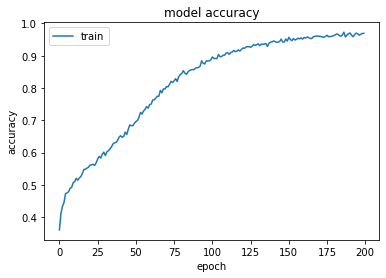

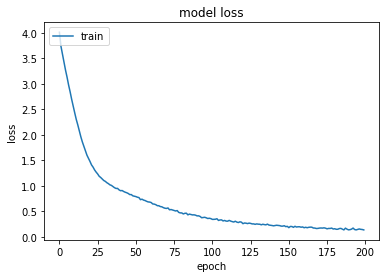

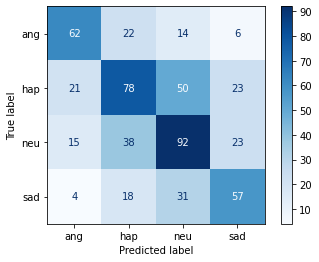

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.16606259346008 (+- 0.0)
> Loss: 3.0585527420043945
> F1: 52.11970218537621
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
156/156 [==============================] - 5s 19ms/step - loss: 4.0366 - accuracy: 0.3471
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7254 - accuracy: 0.4162
Epoch 3/200
156/156 [==============================] - 3s 18ms/step - loss: 3.5633 - accuracy: 0.4500
Epoch 4/200
156/156 [==============================] - 3s 18ms/step - loss: 3.4

156/156 [==============================] - 3s 18ms/step - loss: 0.5474 - accuracy: 0.8106
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5340 - accuracy: 0.8152
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5258 - accuracy: 0.8170
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5201 - accuracy: 0.8184
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5129 - accuracy: 0.8230
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4940 - accuracy: 0.8331
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4788 - accuracy: 0.8345
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4759 - accuracy: 0.8371
Epoch 82/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4930 - accuracy: 0.8282
Epoch 83/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4633 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.1894 - accuracy: 0.9580
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1982 - accuracy: 0.9542
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2058 - accuracy: 0.9522
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2002 - accuracy: 0.9484
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1832 - accuracy: 0.9578
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1765 - accuracy: 0.9594
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2005 - accuracy: 0.9514
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1998 - accuracy: 0.9512
Epoch 161/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1827 - accuracy: 0.9548
Epoch 162/200
156/156 [==============================] - 3s 18ms/step - loss: 

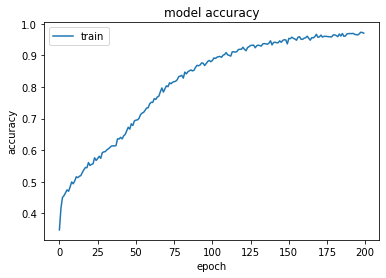

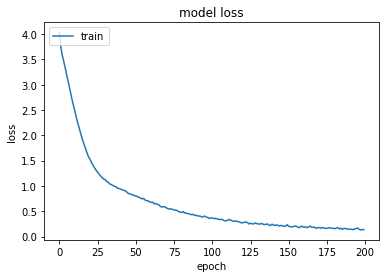

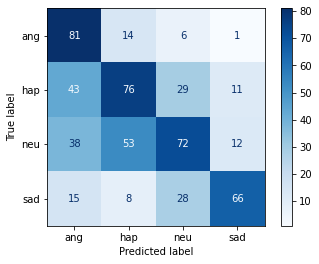

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.755725383758545 (+- 0.5896627902984619)
> Loss: 3.344623327255249
> F1: 52.55949982749938
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
156/156 [==============================] - 4s 19ms/step - loss: 4.0163 - accuracy: 0.3517
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7328 - accuracy: 0.4192
Ep

156/156 [==============================] - 3s 18ms/step - loss: 0.5373 - accuracy: 0.8076
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5371 - accuracy: 0.8126
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5281 - accuracy: 0.8202
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5078 - accuracy: 0.8282
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4962 - accuracy: 0.8294
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5007 - accuracy: 0.8232
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4881 - accuracy: 0.8303
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4753 - accuracy: 0.8347
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4825 - accuracy: 0.8387
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4540 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2141 - accuracy: 0.9419
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2114 - accuracy: 0.9454
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1890 - accuracy: 0.9536
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2011 - accuracy: 0.9506
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1967 - accuracy: 0.9502
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2022 - accuracy: 0.9516
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1940 - accuracy: 0.9498
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1829 - accuracy: 0.9558
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1782 - accuracy: 0.9570
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 

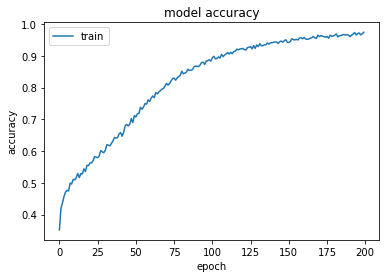

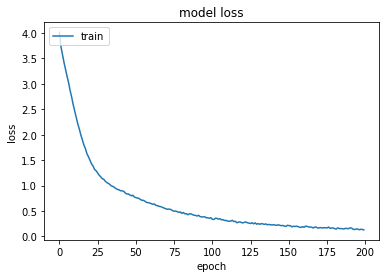

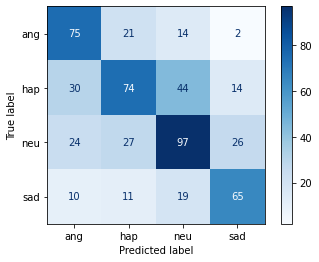

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 53.91671657562256 (+- 1.7110238356064353)
> Loss: 3.293306589126587
> F1: 53.70112765114493
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
156/156 [====================

156/156 [==============================] - 3s 18ms/step - loss: 0.5915 - accuracy: 0.7911
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5790 - accuracy: 0.7923
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5587 - accuracy: 0.8001
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5617 - accuracy: 0.7959
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5520 - accuracy: 0.7997
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5287 - accuracy: 0.8120
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5187 - accuracy: 0.8140
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5177 - accuracy: 0.8144
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5130 - accuracy: 0.8236
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4826 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2178 - accuracy: 0.9409
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2172 - accuracy: 0.9403
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2013 - accuracy: 0.9500
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1927 - accuracy: 0.9514
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2043 - accuracy: 0.9474
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2079 - accuracy: 0.9470
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2128 - accuracy: 0.9454
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1912 - accuracy: 0.9500
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2097 - accuracy: 0.9476
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 

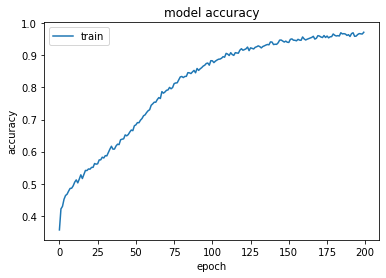

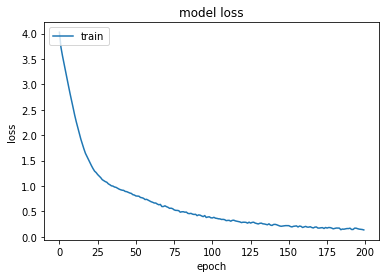

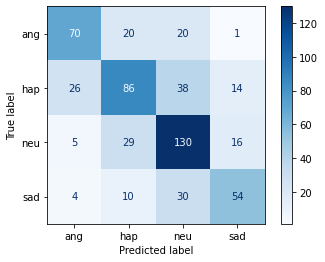

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 55.80824315547943 (+- 3.595736410170402)
> Loss: 3.128840148448944
> F1: 55.5858129900167
------------------------------------------------

156/156 [==============================] - 3s 18ms/step - loss: 0.5789 - accuracy: 0.7979
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5764 - accuracy: 0.7879
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5518 - accuracy: 0.8070
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5333 - accuracy: 0.8112
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5430 - accuracy: 0.8045
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5322 - accuracy: 0.8176
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5063 - accuracy: 0.8290
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5193 - accuracy: 0.8204
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5053 - accuracy: 0.8194
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5020 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2050 - accuracy: 0.9548
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2062 - accuracy: 0.9500
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2029 - accuracy: 0.9520
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1961 - accuracy: 0.9530
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2026 - accuracy: 0.9524
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1940 - accuracy: 0.9538
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1880 - accuracy: 0.9546
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1980 - accuracy: 0.9504
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1977 - accuracy: 0.9524
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 

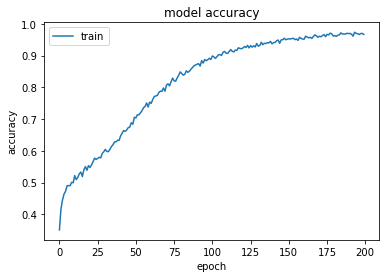

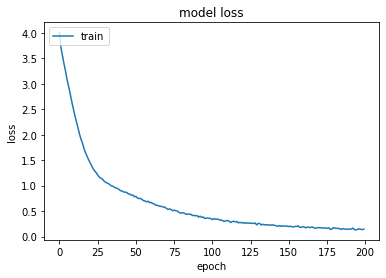

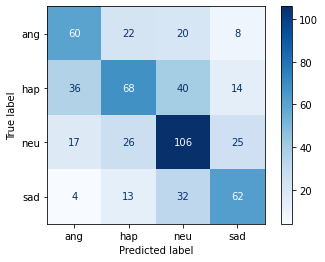

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
Average scores

156/156 [==============================] - 3s 18ms/step - loss: 0.5983 - accuracy: 0.7784
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5887 - accuracy: 0.7897
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5790 - accuracy: 0.7963
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5503 - accuracy: 0.8088
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5530 - accuracy: 0.8019
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5339 - accuracy: 0.8122
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5355 - accuracy: 0.8124
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5281 - accuracy: 0.8194
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5227 - accuracy: 0.8186
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5130 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2208 - accuracy: 0.9419
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2225 - accuracy: 0.9450
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2005 - accuracy: 0.9474
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2054 - accuracy: 0.9504
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1984 - accuracy: 0.9490
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1967 - accuracy: 0.9468
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1887 - accuracy: 0.9560
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2250 - accuracy: 0.9397
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2031 - accuracy: 0.9484
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 

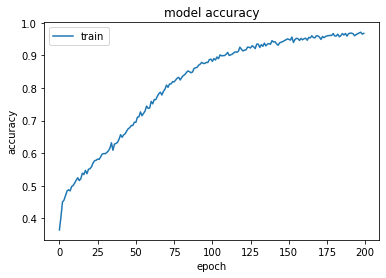

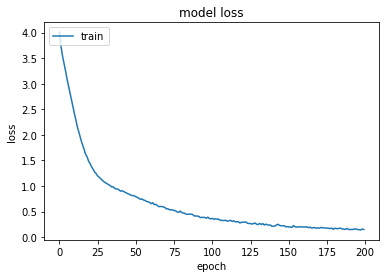

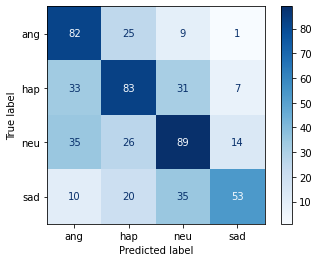

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.6342 - accuracy: 0.7656
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6195 - accuracy: 0.7732
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5934 - accuracy: 0.7788
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5854 - accuracy: 0.7855
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5590 - accuracy: 0.8021
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5672 - accuracy: 0.8053
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5862 - accuracy: 0.7883
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5687 - accuracy: 0.7947
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5467 - accuracy: 0.8045
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5453 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2216 - accuracy: 0.9395
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2278 - accuracy: 0.9405
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2277 - accuracy: 0.9393
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2317 - accuracy: 0.9395
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2031 - accuracy: 0.9484
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2159 - accuracy: 0.9429
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1989 - accuracy: 0.9508
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2109 - accuracy: 0.9472
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1880 - accuracy: 0.9540
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 

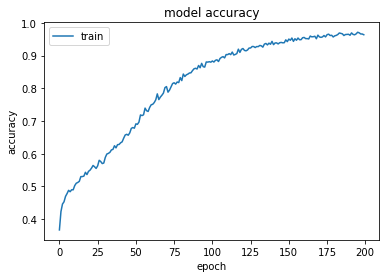

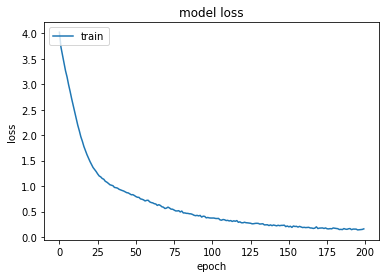

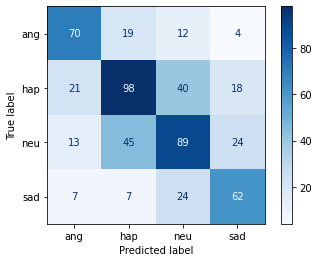

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.6414 - accuracy: 0.7642
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6290 - accuracy: 0.7716
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6189 - accuracy: 0.7812
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5893 - accuracy: 0.7881
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6035 - accuracy: 0.7889
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5940 - accuracy: 0.7853
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5757 - accuracy: 0.7979
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5566 - accuracy: 0.8005
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5446 - accuracy: 0.8130
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5374 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2277 - accuracy: 0.9375
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2094 - accuracy: 0.9486
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2025 - accuracy: 0.9478
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2092 - accuracy: 0.9464
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2217 - accuracy: 0.9438
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2150 - accuracy: 0.9488
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2235 - accuracy: 0.9417
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1959 - accuracy: 0.9532
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1836 - accuracy: 0.9546
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 

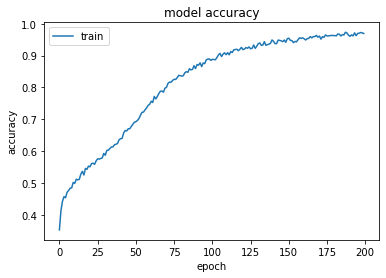

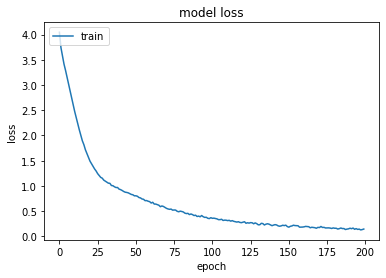

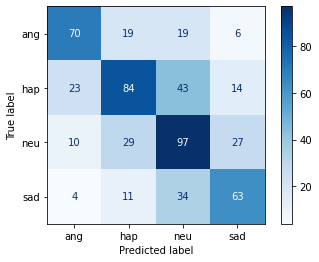

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.6562 - accuracy: 0.7638
Epoch 64/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6372 - accuracy: 0.7698
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6174 - accuracy: 0.7718
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6164 - accuracy: 0.7816
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6028 - accuracy: 0.7822
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5886 - accuracy: 0.7885
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5772 - accuracy: 0.7917
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5752 - accuracy: 0.7935
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5679 - accuracy: 0.8013
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5665 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2367 - accuracy: 0.9391
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2242 - accuracy: 0.9427
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2166 - accuracy: 0.9478
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2040 - accuracy: 0.9498
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2316 - accuracy: 0.9434
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2158 - accuracy: 0.9464
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2304 - accuracy: 0.9413
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2196 - accuracy: 0.9486
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2092 - accuracy: 0.9496
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 

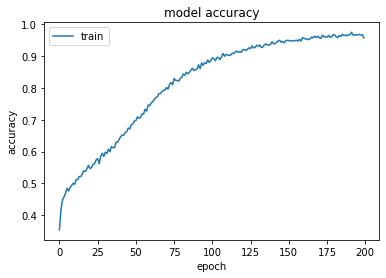

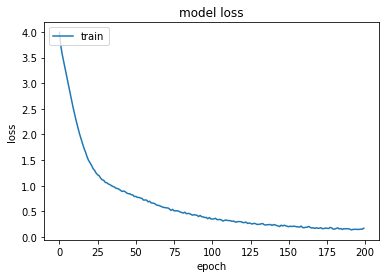

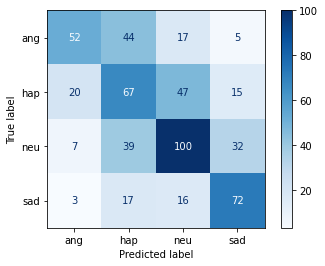

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.6595 - accuracy: 0.7527
Epoch 62/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6376 - accuracy: 0.7652
Epoch 63/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6335 - accuracy: 0.7698
Epoch 64/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6164 - accuracy: 0.7728
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6276 - accuracy: 0.7720
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5876 - accuracy: 0.7925
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5909 - accuracy: 0.7824
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5870 - accuracy: 0.7893
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5668 - accuracy: 0.8039
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5624 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2476 - accuracy: 0.9345
Epoch 141/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2211 - accuracy: 0.9399
Epoch 142/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2224 - accuracy: 0.9419
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2177 - accuracy: 0.9419
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2248 - accuracy: 0.9423
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2275 - accuracy: 0.9363
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2102 - accuracy: 0.9440
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2281 - accuracy: 0.9421
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2049 - accuracy: 0.9496
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 

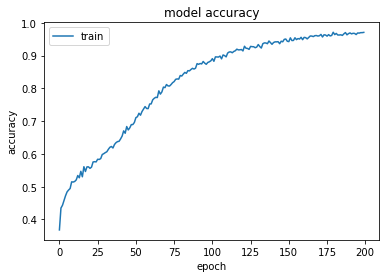

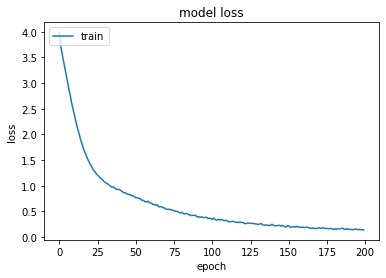

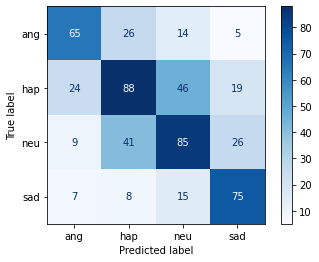

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.0585527420043945 - Accuracy: 52.16606259346008% - F1: 52.11970218537621
------------------------------------------------------------------------
> Fold 2 - Loss: 3.6306939125061035 - Accuracy: 53.34538817405701% - F1: 52.99929746962254
------------------------------------------------------------------------
> Fold 3 - Loss: 3.1906731128692627 - Accuracy: 56.238698959350586% - F1: 55.984383298436036
------------------------------------------------------------------------
> Fold 4 - Loss: 2.6354408264160156 - Accuracy: 61.48282289505005% - F1: 61.239869006632006
------------------------------------------------------------------------
> Fold 5 - Loss: 3.0127570629119873 - Accuracy: 53.526222705841064% - F1: 53.299418908005904
------------------------------------------------------------------------
> Fold 6 - Los

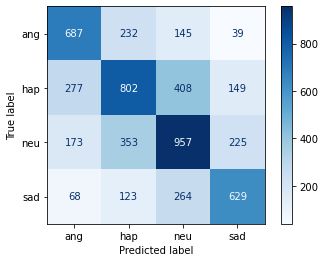

In [ ]:
k_fold_fit_re('CNN1D', XX, yy, folds=10, numepoch = 200, batchsize = 32)

In [ ]:
def strat_k_fold_fit_re(model_type,X, yy, folds=10, lr=0.0001, numepoch = 50, batchsize = 32):
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import confusion_matrix
  from tensorflow.keras.optimizers import SGD
  from sklearn.preprocessing import LabelEncoder
  from sklearn.metrics import f1_score
  le = LabelEncoder()
  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []
  f1_per_fold = []
  verbosity = 1
  # Define the stratified K-fold Cross Validator
  kfold = StratifiedKFold(n_splits=folds, shuffle=True)
  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(X, y):
    #label encoding comes after the split
    yy = to_categorical(le.fit_transform(y))
    model = CNN1D()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model and save details to history
    history = model.fit(X[train], yy[train],
                batch_size=batchsize,
                epochs=numepoch,
                verbose=verbosity)
    # Generate generalization metrics
    scores = model.evaluate(X[test], yy[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    #Confusion matrix
    y_pred = np.argmax(model.predict(X[test]), axis=-1)
    matrix = metrics.confusion_matrix(yy[test].argmax(axis=1), y_pred)
    #f1 score
    f1_score_temp = f1_score(yy[test].argmax(axis=1), y_pred, average='weighted')
    f1_per_fold.append(f1_score_temp*100)
    #conf matrix ctnd
    rounded_labels= np.unique(le.inverse_transform(np.argmax(yy[test], axis=1)))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
    disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')
    plt.show()
    # == Print average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1: {f1_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print(f'> F1: {np.mean(f1_per_fold)}')
    print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
156/156 [==============================] - 4s 20ms/step - loss: 4.0005 - accuracy: 0.3635
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7129 - accuracy: 0.4191
Epoch 3/200
156/156 [==============================] - 3s 18ms/step - loss: 3.5413 - accuracy: 0.4440
Epoch 4/200
156/156 [==============================] - 3s 18ms/step - loss: 3.3934 - accuracy: 0.4501
Epoch 5/200
156/156 [==============================] - 3s 18ms/step - loss: 3.2502 - accuracy: 0.4744
Epoch 6/200
156/156 [==============================] - 3s 18ms/step - loss: 3.0884 - accuracy: 0.4868
Epoch 7/200
156/156 [==============================] - 3s 18ms/step - loss: 2.9494 - accuracy: 0.4878
Epoch 8/200
156/156 [==============================] - 3s 18ms/step - loss: 2.8149 - accuracy: 0.4828
Epoch 9/200
156/156 [==============================] - 3s 18ms/step - loss: 2.6729 - ac

156/156 [==============================] - 3s 18ms/step - loss: 0.4954 - accuracy: 0.8366
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4880 - accuracy: 0.8387
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4894 - accuracy: 0.8330
Epoch 82/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4710 - accuracy: 0.8409
Epoch 83/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4649 - accuracy: 0.8425
Epoch 84/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4682 - accuracy: 0.8457
Epoch 85/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4308 - accuracy: 0.8581
Epoch 86/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4418 - accuracy: 0.8513
Epoch 87/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4319 - accuracy: 0.8608
Epoch 88/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4401 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.1980 - accuracy: 0.9524
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2035 - accuracy: 0.9458
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2015 - accuracy: 0.9526
Epoch 161/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1986 - accuracy: 0.9496
Epoch 162/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1997 - accuracy: 0.9504
Epoch 163/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1786 - accuracy: 0.9584
Epoch 164/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1910 - accuracy: 0.9530
Epoch 165/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1714 - accuracy: 0.9598
Epoch 166/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1719 - accuracy: 0.9574
Epoch 167/200
156/156 [==============================] - 3s 17ms/step - loss: 

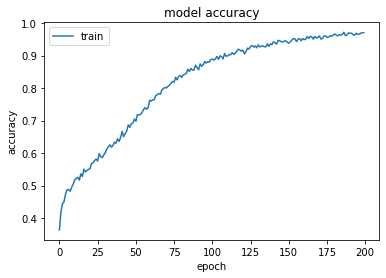

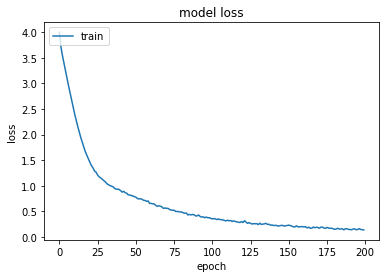

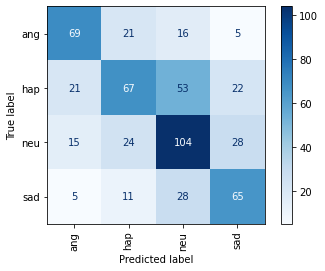

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 55.05415201187134 (+- 0.0)
> Loss: 3.2617106437683105
> F1: 54.724454701922
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
156/156 [==============================] - 5s 19ms/step - loss: 4.0403 - accuracy: 0.3576
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7536 - accuracy: 0.4012
Epoch 3/200
156/156 [==============================] - 3s 18ms/step - loss: 3.5734 - accuracy: 0.4323
Epoch 4/200
156/156 [==============================] - 3s 18ms/step - loss: 3.4128

156/156 [==============================] - 3s 18ms/step - loss: 0.5419 - accuracy: 0.8051
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5359 - accuracy: 0.8100
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5269 - accuracy: 0.8166
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5048 - accuracy: 0.8232
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4999 - accuracy: 0.8282
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5004 - accuracy: 0.8250
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4978 - accuracy: 0.8297
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5017 - accuracy: 0.8264
Epoch 82/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4746 - accuracy: 0.8387
Epoch 83/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4813 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2138 - accuracy: 0.9448
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2091 - accuracy: 0.9458
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1967 - accuracy: 0.9486
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2059 - accuracy: 0.9470
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2035 - accuracy: 0.9500
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2063 - accuracy: 0.9456
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1828 - accuracy: 0.9548
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1907 - accuracy: 0.9544
Epoch 161/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1844 - accuracy: 0.9558
Epoch 162/200
156/156 [==============================] - 3s 18ms/step - loss: 

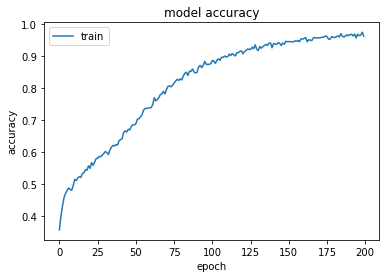

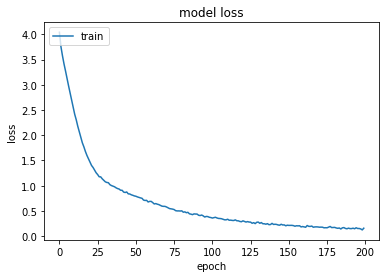

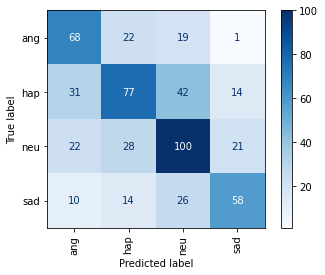

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 54.92309629917145 (+- 0.13105571269989014)
> Loss: 3.1726014614105225
> F1: 54.706872415238664
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
156/156 [==============================] - 4s 19ms/step - loss: 4.0111 - accuracy: 0.3544
Epoch 2/200
156/156 [==============================] - 3s 18ms/step - loss: 3.7098 - accuracy: 0.4231


156/156 [==============================] - 3s 18ms/step - loss: 0.5768 - accuracy: 0.7885
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5669 - accuracy: 0.7963
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5540 - accuracy: 0.7981
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5321 - accuracy: 0.8144
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5203 - accuracy: 0.8166
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5319 - accuracy: 0.8090
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5262 - accuracy: 0.8184
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5126 - accuracy: 0.8156
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4899 - accuracy: 0.8260
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4907 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2036 - accuracy: 0.9438
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2238 - accuracy: 0.9395
Epoch 153/200
156/156 [==============================] - 3s 19ms/step - loss: 0.2055 - accuracy: 0.9474
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2095 - accuracy: 0.9434
Epoch 155/200
156/156 [==============================] - 3s 19ms/step - loss: 0.2169 - accuracy: 0.9399
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1990 - accuracy: 0.9476
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1994 - accuracy: 0.9460
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1819 - accuracy: 0.9546
Epoch 159/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1979 - accuracy: 0.9474
Epoch 160/200
156/156 [==============================] - 3s 18ms/step - loss: 

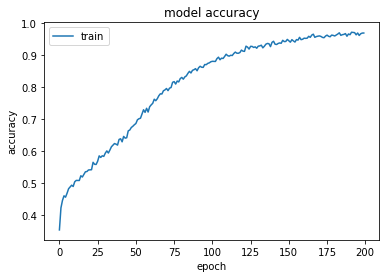

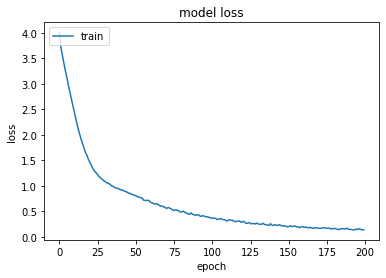

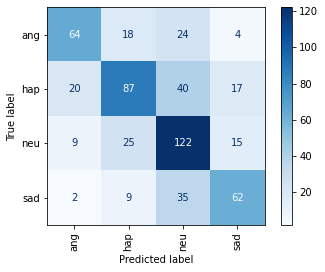

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 56.8082849184672 (+- 2.668205887957673)
> Loss: 2.965288003285726
> F1: 56.62252186929826
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
156/156 [=======================

156/156 [==============================] - 3s 18ms/step - loss: 0.5540 - accuracy: 0.8015
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5470 - accuracy: 0.8074
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5464 - accuracy: 0.8076
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5289 - accuracy: 0.8160
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5305 - accuracy: 0.8184
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5050 - accuracy: 0.8242
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5097 - accuracy: 0.8254
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4989 - accuracy: 0.8339
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4873 - accuracy: 0.8359
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4756 - 

156/156 [==============================] - 3s 19ms/step - loss: 0.2016 - accuracy: 0.9486
Epoch 151/200
156/156 [==============================] - 3s 19ms/step - loss: 0.2074 - accuracy: 0.9476
Epoch 152/200
156/156 [==============================] - 3s 19ms/step - loss: 0.1931 - accuracy: 0.9514
Epoch 153/200
156/156 [==============================] - 3s 20ms/step - loss: 0.1815 - accuracy: 0.9554
Epoch 154/200
156/156 [==============================] - 3s 21ms/step - loss: 0.1953 - accuracy: 0.9494
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1829 - accuracy: 0.9568
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2099 - accuracy: 0.9488
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2102 - accuracy: 0.9482
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1957 - accuracy: 0.9510
Epoch 159/200
156/156 [==============================] - 3s 19ms/step - loss: 

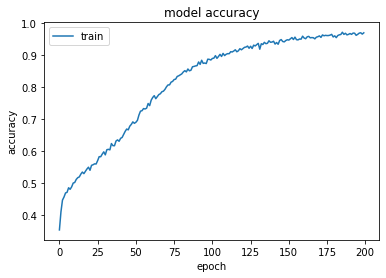

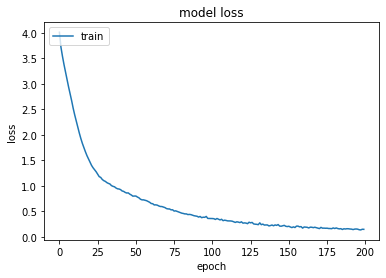

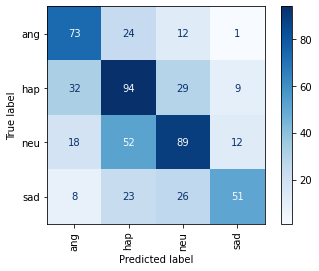

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 56.48505687713623 (+- 2.377587242459668)
> Loss: 2.956366777420044
> F1: 56.34336504881
-----------------------------------------------------

156/156 [==============================] - 3s 18ms/step - loss: 0.5630 - accuracy: 0.8035
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5519 - accuracy: 0.7997
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5612 - accuracy: 0.8021
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5291 - accuracy: 0.8174
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5373 - accuracy: 0.8158
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5207 - accuracy: 0.8146
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5094 - accuracy: 0.8264
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5085 - accuracy: 0.8196
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4991 - accuracy: 0.8206
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.4863 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2136 - accuracy: 0.9440
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2227 - accuracy: 0.9421
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2118 - accuracy: 0.9431
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2058 - accuracy: 0.9452
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2021 - accuracy: 0.9492
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1947 - accuracy: 0.9556
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2105 - accuracy: 0.9468
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2199 - accuracy: 0.9442
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2043 - accuracy: 0.9502
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 

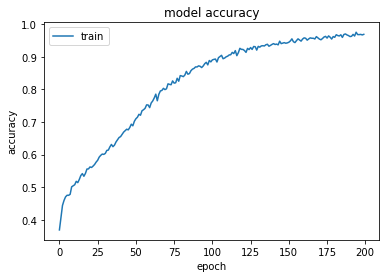

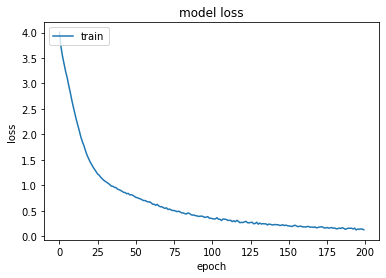

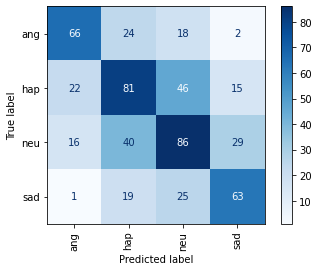

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
Average scores for

156/156 [==============================] - 3s 18ms/step - loss: 0.5965 - accuracy: 0.7867
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5930 - accuracy: 0.7875
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5792 - accuracy: 0.7961
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5606 - accuracy: 0.7995
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5569 - accuracy: 0.8035
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5452 - accuracy: 0.8102
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5244 - accuracy: 0.8188
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5256 - accuracy: 0.8210
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5400 - accuracy: 0.8164
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5081 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2095 - accuracy: 0.9470
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2118 - accuracy: 0.9464
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2139 - accuracy: 0.9458
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2201 - accuracy: 0.9397
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2040 - accuracy: 0.9464
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2283 - accuracy: 0.9415
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2149 - accuracy: 0.9466
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2089 - accuracy: 0.9508
Epoch 155/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2075 - accuracy: 0.9476
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 

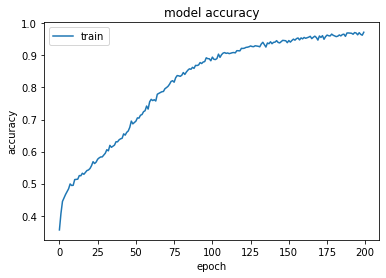

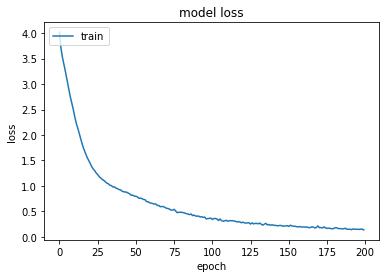

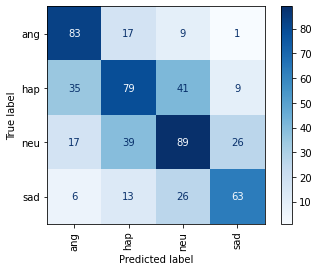

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
> Fold 6 - Loss: 2

156/156 [==============================] - 3s 17ms/step - loss: 0.6394 - accuracy: 0.7601
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6220 - accuracy: 0.7780
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6237 - accuracy: 0.7702
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5961 - accuracy: 0.7748
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5964 - accuracy: 0.7879
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5777 - accuracy: 0.7965
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5671 - accuracy: 0.7967
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5632 - accuracy: 0.7943
Epoch 74/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5808 - accuracy: 0.7901
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5417 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.2354 - accuracy: 0.9371
Epoch 146/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2183 - accuracy: 0.9444
Epoch 147/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2074 - accuracy: 0.9470
Epoch 148/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2169 - accuracy: 0.9442
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2381 - accuracy: 0.9375
Epoch 150/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2288 - accuracy: 0.9377
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2252 - accuracy: 0.9383
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2005 - accuracy: 0.9522
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1991 - accuracy: 0.9514
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 

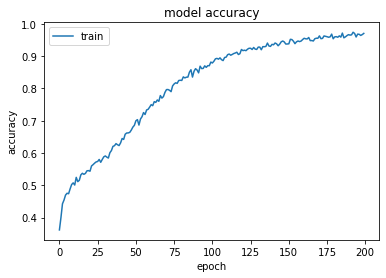

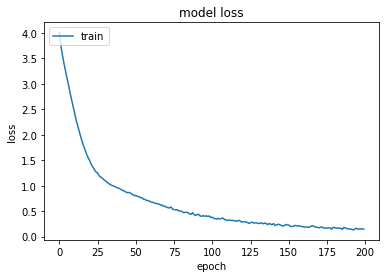

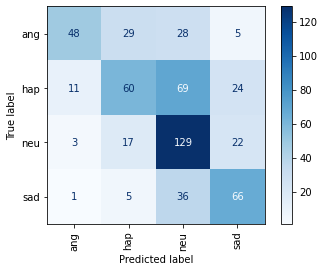

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
> Fold 6 - Loss: 2

156/156 [==============================] - 3s 17ms/step - loss: 0.6637 - accuracy: 0.7539
Epoch 65/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6382 - accuracy: 0.7662
Epoch 66/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6464 - accuracy: 0.7702
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6266 - accuracy: 0.7742
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6239 - accuracy: 0.7774
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5956 - accuracy: 0.7869
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5969 - accuracy: 0.7802
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5910 - accuracy: 0.7889
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5672 - accuracy: 0.7945
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5771 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.2374 - accuracy: 0.9417
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2170 - accuracy: 0.9436
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2381 - accuracy: 0.9337
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2183 - accuracy: 0.9413
Epoch 147/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2152 - accuracy: 0.9504
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2174 - accuracy: 0.9429
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2045 - accuracy: 0.9500
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2111 - accuracy: 0.9454
Epoch 151/200
156/156 [==============================] - 3s 20ms/step - loss: 0.2151 - accuracy: 0.9440
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 

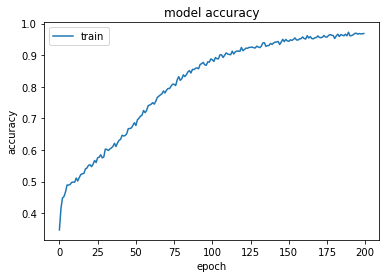

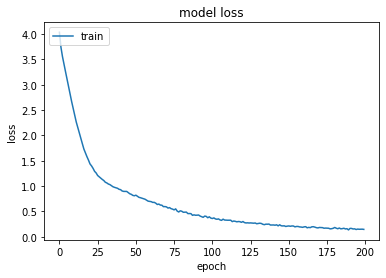

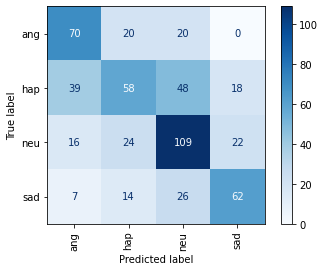

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
> Fold 6 - Loss: 2

156/156 [==============================] - 3s 18ms/step - loss: 0.6447 - accuracy: 0.7668
Epoch 64/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6331 - accuracy: 0.7660
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6174 - accuracy: 0.7790
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5930 - accuracy: 0.7941
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5949 - accuracy: 0.7957
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5835 - accuracy: 0.7905
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5905 - accuracy: 0.7865
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5658 - accuracy: 0.8037
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5435 - accuracy: 0.8158
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.5471 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.1947 - accuracy: 0.9518
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2057 - accuracy: 0.9478
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2086 - accuracy: 0.9468
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2222 - accuracy: 0.9440
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2107 - accuracy: 0.9440
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2227 - accuracy: 0.9427
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.2022 - accuracy: 0.9490
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1996 - accuracy: 0.9490
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1964 - accuracy: 0.9476
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 

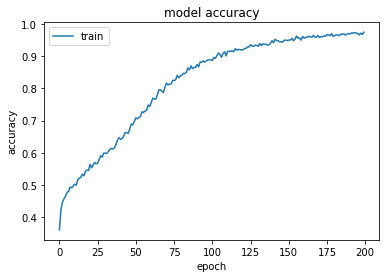

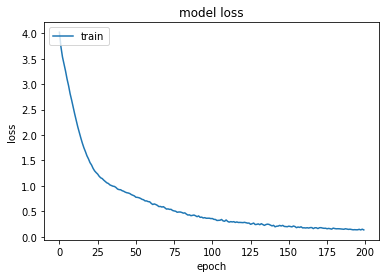

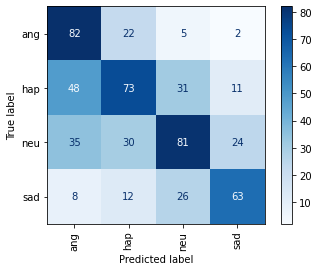

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
> Fold 6 - Loss: 2

156/156 [==============================] - 3s 18ms/step - loss: 0.6794 - accuracy: 0.7489
Epoch 62/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6667 - accuracy: 0.7531
Epoch 63/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6448 - accuracy: 0.7630
Epoch 64/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6571 - accuracy: 0.7613
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6361 - accuracy: 0.7700
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6207 - accuracy: 0.7710
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.6087 - accuracy: 0.7806
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.6222 - accuracy: 0.7784
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5901 - accuracy: 0.7911
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.5877 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.2672 - accuracy: 0.9251
Epoch 141/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2305 - accuracy: 0.9387
Epoch 142/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2355 - accuracy: 0.9409
Epoch 143/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2491 - accuracy: 0.9343
Epoch 144/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2237 - accuracy: 0.9421
Epoch 145/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2058 - accuracy: 0.9510
Epoch 146/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2276 - accuracy: 0.9393
Epoch 147/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2248 - accuracy: 0.9417
Epoch 148/200
156/156 [==============================] - 3s 17ms/step - loss: 0.2204 - accuracy: 0.9458
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 

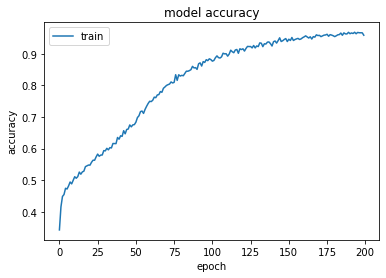

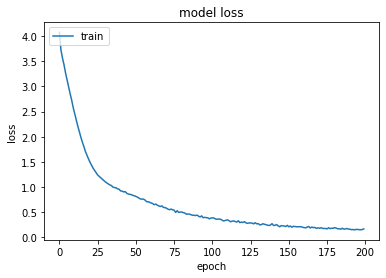

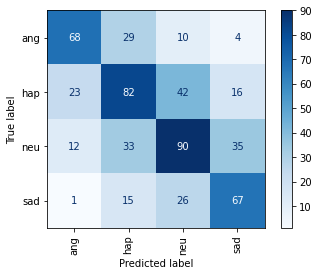

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2617106437683105 - Accuracy: 55.05415201187134% - F1: 54.724454701922%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.0834922790527344 - Accuracy: 54.79204058647156% - F1: 54.68929012855532%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.550661087036133 - Accuracy: 60.578662157058716% - F1: 60.45382077741747%
------------------------------------------------------------------------
> Fold 4 - Loss: 2.929603099822998 - Accuracy: 55.51537275314331% - F1: 55.5058945873452%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.074160575866699 - Accuracy: 53.526222705841064% - F1: 53.57149032316562%
------------------------------------------------------------------------
> Fold 6 - Loss: 2

In [ ]:
strat_k_fold_fit_re('CNN1d', XX, yy, folds=10, lr=0.0001, numepoch = 200, batchsize = 32)

1dCNNLSTM

In [1]:
from keras.layers import Input, CuDNNLSTM, Add, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten,Conv1D, AveragePooling1D, MaxPooling1D, GlobalMaxPooling1D,Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM, CuDNNLSTM
from keras.models import Model, load_model
from tensorflow.keras.regularizers import l2
from keras.initializers import glorot_uniform
def CNN1DLSTM(input_shape=(161,1),classes = 4):
    input = Input(input_shape)
    x = Conv1D(256,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(input)
    x = Conv1D(256,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
    x = Conv1D(128,kernel_size=(5),strides=1,padding="same",activation='relu', kernel_initializer=glorot_uniform())(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = CuDNNLSTM(128,return_sequences = True)(x)
    x = CuDNNLSTM(128)(x)
    x = Dense(128,activation='relu',kernel_initializer=glorot_uniform())(x)
    x = Dropout(0.2)(x)
    x = Dense(64,activation='relu',kernel_initializer=glorot_uniform())(x)
    x = Dropout(0.2)(x)
    output = Dense(classes,activation='softmax',kernel_initializer=glorot_uniform())(x)
    model = Model(inputs=input, outputs=output, name='1DCNN')
    return model

In [ ]:
CNN1DLSTM().summary()

Model: "1DCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 161, 1)]          0         
_________________________________________________________________
conv1d_255 (Conv1D)          (None, 161, 256)          1536      
_________________________________________________________________
conv1d_256 (Conv1D)          (None, 161, 256)          327936    
_________________________________________________________________
batch_normalization_194 (Bat (None, 161, 256)          1024      
_________________________________________________________________
max_pooling1d_200 (MaxPoolin (None, 80, 256)           0         
_________________________________________________________________
conv1d_257 (Conv1D)          (None, 80, 128)           163968    
_________________________________________________________________
conv1d_258 (Conv1D)          (None, 80, 128)           82048 

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
156/156 [==============================] - 4s 17ms/step - loss: 1.2738 - accuracy: 0.3970
Epoch 2/200
156/156 [==============================] - 3s 16ms/step - loss: 1.1736 - accuracy: 0.4473
Epoch 3/200
156/156 [==============================] - 3s 16ms/step - loss: 1.1270 - accuracy: 0.4794
Epoch 4/200
156/156 [==============================] - 3s 17ms/step - loss: 1.1010 - accuracy: 0.4937
Epoch 5/200
156/156 [==============================] - 3s 16ms/step - loss: 1.0807 - accuracy: 0.5051
Epoch 6/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0676 - accuracy: 0.5190
Epoch 7/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0398 - accuracy: 0.5300
Epoch 8/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0295 - accuracy: 0.5423
Epoch 9/200
156/156 [==============================] - 3s 16ms/step - loss: 1.0009 - ac

156/156 [==============================] - 3s 17ms/step - loss: 0.0624 - accuracy: 0.9813
Epoch 80/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0787 - accuracy: 0.9713
Epoch 81/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0512 - accuracy: 0.9839
Epoch 82/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0528 - accuracy: 0.9819
Epoch 83/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0677 - accuracy: 0.9761
Epoch 84/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0933 - accuracy: 0.9683
Epoch 85/200
156/156 [==============================] - 3s 16ms/step - loss: 0.0617 - accuracy: 0.9793
Epoch 86/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 87/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0424 - accuracy: 0.9867
Epoch 88/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0594 - 

156/156 [==============================] - 3s 19ms/step - loss: 0.0128 - accuracy: 0.9962
Epoch 159/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 160/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0752 - accuracy: 0.9747
Epoch 161/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 162/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 163/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0434 - accuracy: 0.9847
Epoch 164/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 165/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 166/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0365 - accuracy: 0.9881
Epoch 167/200
156/156 [==============================] - 3s 20ms/step - loss: 

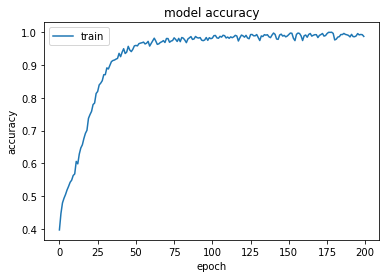

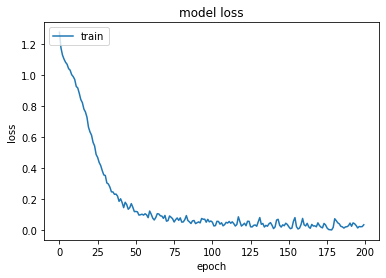

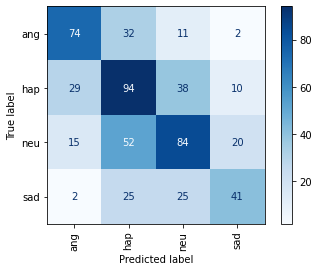

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.888089418411255 (+- 0.0)
> Loss: 3.2398464679718018
> F1: 52.871210070882555
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
156/156 [==============================] - 5s 20ms/step - loss: 1.2577 - accuracy: 0.3963
Epoch 2/200
156/156 [==============================] - 3s 19ms/step - loss: 1.1512 - accuracy: 0.4630
Epoch 3/200
156/156 [==============================] - 3s 18ms/step - loss: 1.1121 - accuracy: 0.4857
Epoch 4/200
156/156 [==============================] - 3s 18ms/step - loss:

156/156 [==============================] - 3s 21ms/step - loss: 0.0742 - accuracy: 0.9721
Epoch 75/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0998 - accuracy: 0.9646
Epoch 76/200
156/156 [==============================] - 3s 22ms/step - loss: 0.0791 - accuracy: 0.9737
Epoch 77/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 78/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0438 - accuracy: 0.9875
Epoch 79/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0376 - accuracy: 0.9875
Epoch 80/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0671 - accuracy: 0.9781
Epoch 81/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0864 - accuracy: 0.9701
Epoch 82/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0446 - accuracy: 0.9875
Epoch 83/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0688 - 

156/156 [==============================] - 3s 21ms/step - loss: 0.0204 - accuracy: 0.9954
Epoch 154/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 155/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0384 - accuracy: 0.9877
Epoch 156/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0329 - accuracy: 0.9896
Epoch 157/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0435 - accuracy: 0.9857
Epoch 158/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0392 - accuracy: 0.9896
Epoch 159/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0323 - accuracy: 0.9877
Epoch 160/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 161/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 162/200
156/156 [==============================] - 3s 21ms/step - loss: 

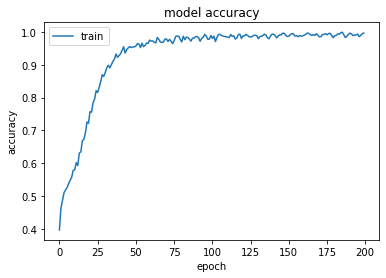

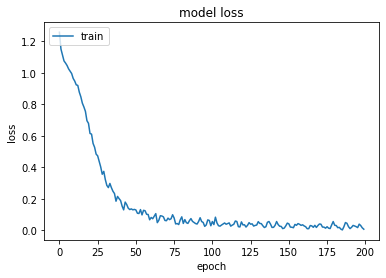

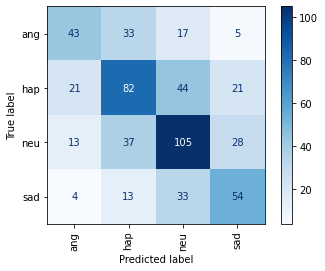

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.12216377258301 (+- 0.7659256458282471)
> Loss: 3.414595365524292
> F1: 52.059995988219725
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
156/156 [==============================] - 6s 23ms/step - loss: 1.2556 - accuracy: 0.4040
Epoch 2/200
156/156 [==============================] - 3s 22ms/step - loss: 1.1645 - accuracy: 0.4594

156/156 [==============================] - 3s 17ms/step - loss: 0.0743 - accuracy: 0.9731
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0603 - accuracy: 0.9805
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0672 - accuracy: 0.9789
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0625 - accuracy: 0.9793
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0783 - accuracy: 0.9735
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0807 - accuracy: 0.9735
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0555 - accuracy: 0.9819
Epoch 79/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0756 - accuracy: 0.9749
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0310 - accuracy: 0.9906
Epoch 81/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0346 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0177 - accuracy: 0.9954
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0389 - accuracy: 0.9890
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0480 - accuracy: 0.9851
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0451 - accuracy: 0.9845
Epoch 156/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0290 - accuracy: 0.9894
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0271 - accuracy: 0.9932
Epoch 158/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0154 - accuracy: 0.9954
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0147 - accuracy: 0.9958
Epoch 160/200
156/156 [==============================] - 3s 17ms/step - loss: 

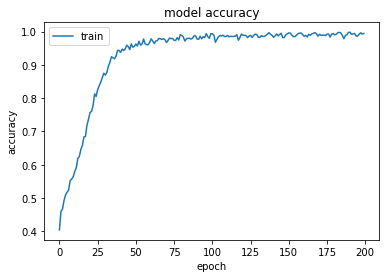

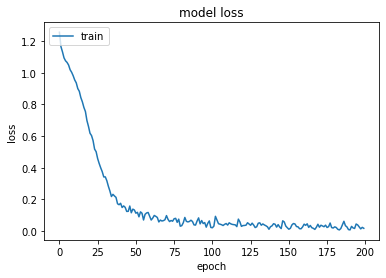

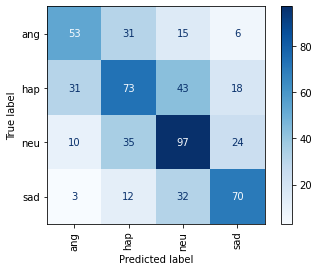

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.409350872039795 (+- 0.7456859862885203)
> Loss: 3.4332540035247803
> F1: 52.3235884365183
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
156/156 [===================

156/156 [==============================] - 3s 18ms/step - loss: 0.1014 - accuracy: 0.9652
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0865 - accuracy: 0.9727
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0629 - accuracy: 0.9813
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0773 - accuracy: 0.9733
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0687 - accuracy: 0.9773
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0570 - accuracy: 0.9819
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0532 - accuracy: 0.9815
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0679 - accuracy: 0.9769
Epoch 79/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0806 - accuracy: 0.9721
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0470 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0416 - accuracy: 0.9851
Epoch 151/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0427 - accuracy: 0.9871
Epoch 152/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0288 - accuracy: 0.9928
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0404 - accuracy: 0.9869
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0513 - accuracy: 0.9855
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0418 - accuracy: 0.9873
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 158/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 

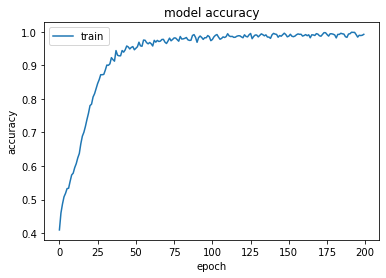

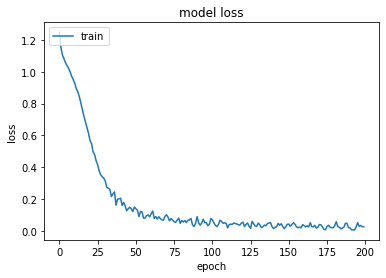

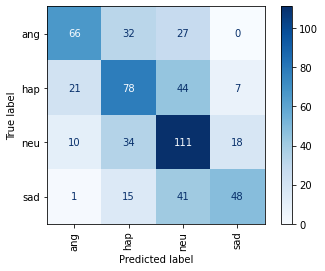

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 53.005023300647736 (+- 1.2171740299650493)
> Loss: 3.4209981560707092
> F1: 52.95576766997168
----------------------------------------------

156/156 [==============================] - 3s 17ms/step - loss: 0.0646 - accuracy: 0.9793
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0779 - accuracy: 0.9733
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0562 - accuracy: 0.9811
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1020 - accuracy: 0.9665
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0716 - accuracy: 0.9777
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0642 - accuracy: 0.9785
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0315 - accuracy: 0.9906
Epoch 76/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0375 - accuracy: 0.9877
Epoch 77/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0886 - accuracy: 0.9725
Epoch 78/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0856 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0307 - accuracy: 0.9906
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0286 - accuracy: 0.9906
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0705 - accuracy: 0.9773
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0329 - accuracy: 0.9892
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0249 - accuracy: 0.9930
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0176 - accuracy: 0.9952
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 157/200
156/156 [==============================] - 3s 18ms/step - loss: 

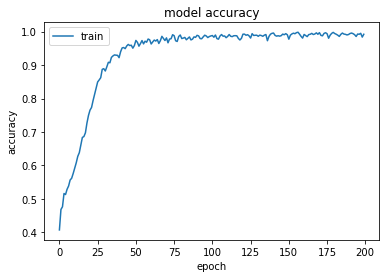

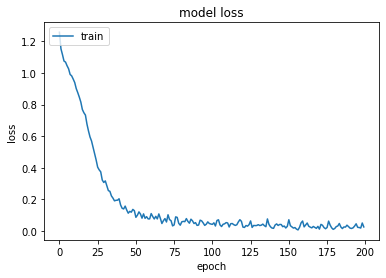

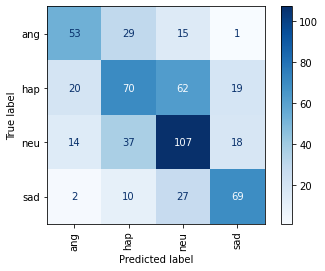

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
Average scores fo

156/156 [==============================] - 3s 18ms/step - loss: 0.0750 - accuracy: 0.9729
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0783 - accuracy: 0.9725
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0843 - accuracy: 0.9693
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0599 - accuracy: 0.9791
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0521 - accuracy: 0.9841
Epoch 74/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1061 - accuracy: 0.9652
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0914 - accuracy: 0.9685
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0403 - accuracy: 0.9877
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0652 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0202 - accuracy: 0.9940
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0673 - accuracy: 0.9803
Epoch 149/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0588 - accuracy: 0.9809
Epoch 150/200
156/156 [==============================] - 4s 28ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0099 - accuracy: 0.9970
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0154 - accuracy: 0.9954
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0390 - accuracy: 0.9851
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0532 - accuracy: 0.9835
Epoch 155/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 156/200
156/156 [==============================] - 3s 19ms/step - loss: 

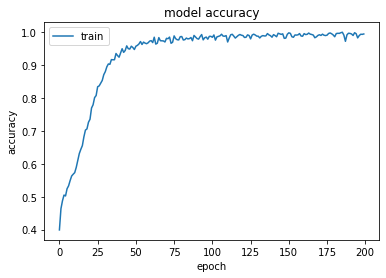

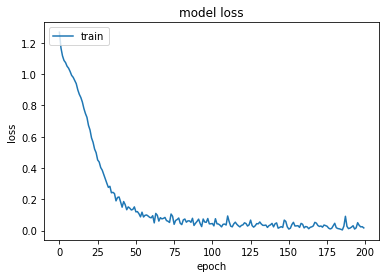

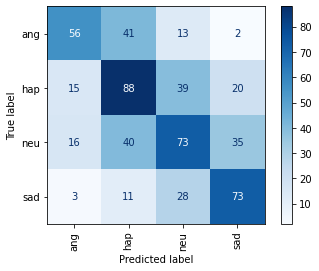

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
> Fold 6 - Loss: 

156/156 [==============================] - 3s 17ms/step - loss: 0.0620 - accuracy: 0.9807
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1052 - accuracy: 0.9663
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0601 - accuracy: 0.9801
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0684 - accuracy: 0.9763
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1069 - accuracy: 0.9620
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0802 - accuracy: 0.9715
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0804 - accuracy: 0.9723
Epoch 75/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0692 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0122 - accuracy: 0.9964
Epoch 146/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0238 - accuracy: 0.9908
Epoch 147/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0405 - accuracy: 0.9881
Epoch 148/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0649 - accuracy: 0.9791
Epoch 149/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0367 - accuracy: 0.9873
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0244 - accuracy: 0.9906
Epoch 151/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0403 - accuracy: 0.9871
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0302 - accuracy: 0.9900
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 

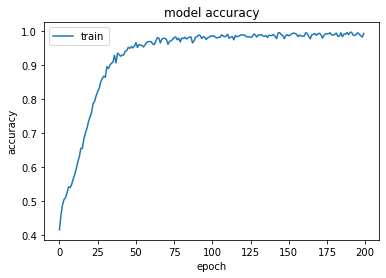

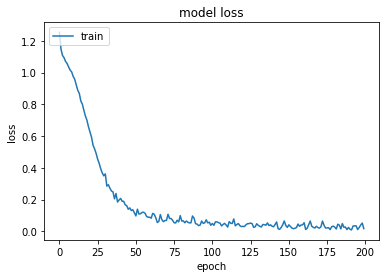

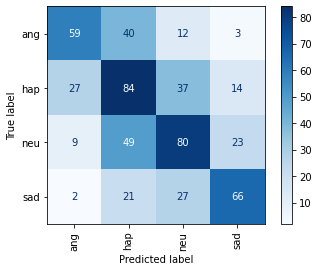

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
> Fold 6 - Loss: 

156/156 [==============================] - 3s 18ms/step - loss: 0.1002 - accuracy: 0.9650
Epoch 65/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0668 - accuracy: 0.9801
Epoch 66/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0703 - accuracy: 0.9755
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0716 - accuracy: 0.9753
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0642 - accuracy: 0.9813
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0773 - accuracy: 0.9731
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1012 - accuracy: 0.9642
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0844 - accuracy: 0.9715
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0705 - accuracy: 0.9767
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0423 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0137 - accuracy: 0.9962
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0480 - accuracy: 0.9847
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0590 - accuracy: 0.9813
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0294 - accuracy: 0.9928
Epoch 147/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0428 - accuracy: 0.9881
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0317 - accuracy: 0.9890
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 150/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0233 - accuracy: 0.9922
Epoch 151/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0260 - accuracy: 0.9898
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 

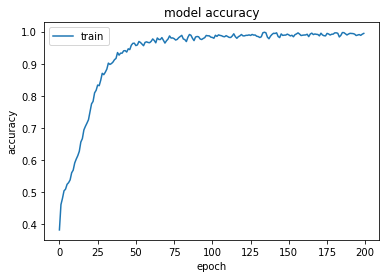

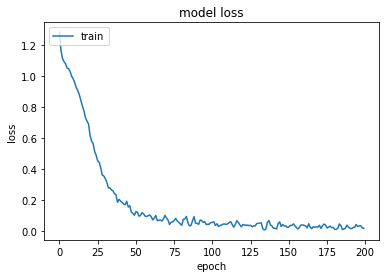

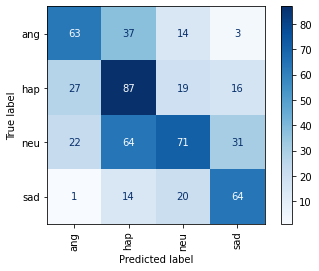

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
> Fold 6 - Loss: 

156/156 [==============================] - 3s 18ms/step - loss: 0.0792 - accuracy: 0.9709
Epoch 64/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0986 - accuracy: 0.9658
Epoch 65/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0675 - accuracy: 0.9785
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0944 - accuracy: 0.9661
Epoch 67/200
156/156 [==============================] - 3s 19ms/step - loss: 0.1106 - accuracy: 0.9630
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0599 - accuracy: 0.9813
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0540 - accuracy: 0.9823
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0413 - accuracy: 0.9879
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0898 - accuracy: 0.9715
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1011 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0544 - accuracy: 0.9829
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 144/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0335 - accuracy: 0.9904
Epoch 145/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0370 - accuracy: 0.9902
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0178 - accuracy: 0.9950
Epoch 147/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0304 - accuracy: 0.9918
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0320 - accuracy: 0.9894
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0400 - accuracy: 0.9879
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0199 - accuracy: 0.9942
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 

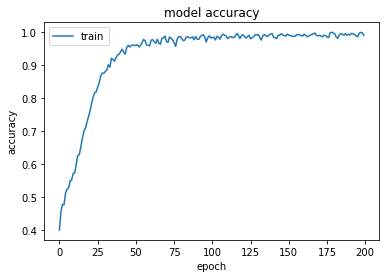

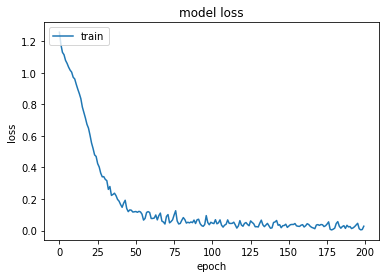

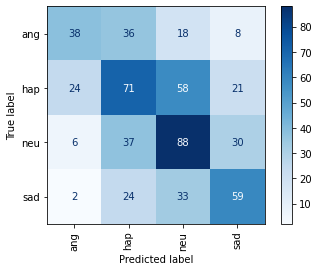

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
> Fold 6 - Loss: 

156/156 [==============================] - 3s 18ms/step - loss: 0.1278 - accuracy: 0.9584
Epoch 62/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0981 - accuracy: 0.9650
Epoch 63/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0803 - accuracy: 0.9739
Epoch 64/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0933 - accuracy: 0.9695
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0824 - accuracy: 0.9747
Epoch 66/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0647 - accuracy: 0.9817
Epoch 67/200
156/156 [==============================] - 9s 56ms/step - loss: 0.0686 - accuracy: 0.9773
Epoch 68/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0924 - accuracy: 0.9685
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1045 - accuracy: 0.9644
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0581 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0415 - accuracy: 0.9855
Epoch 141/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0281 - accuracy: 0.9916
Epoch 142/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0167 - accuracy: 0.9958
Epoch 144/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 145/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0274 - accuracy: 0.9902
Epoch 146/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0535 - accuracy: 0.9843
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 148/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0334 - accuracy: 0.9883
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 

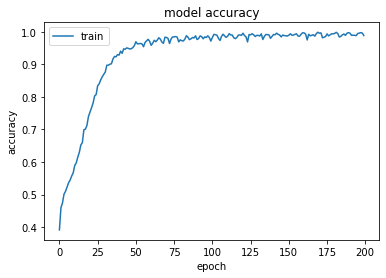

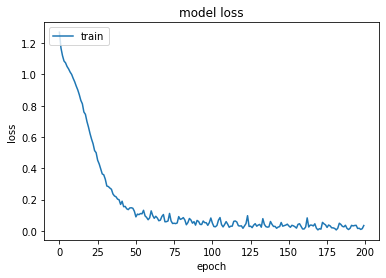

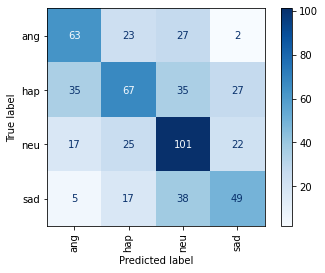

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2398464679718018 - Accuracy: 52.888089418411255% - F1: 52.871210070882555
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5893442630767822 - Accuracy: 51.35623812675476% - F1: 51.248781905556896
------------------------------------------------------------------------
> Fold 3 - Loss: 3.470571279525757 - Accuracy: 52.98372507095337% - F1: 52.85077333311544
------------------------------------------------------------------------
> Fold 4 - Loss: 3.384230613708496 - Accuracy: 54.79204058647156% - F1: 54.85230537033181
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2144076824188232 - Accuracy: 54.06871438026428% - F1: 53.836389605692126
------------------------------------------------------------------------
> Fold 6 - Loss: 

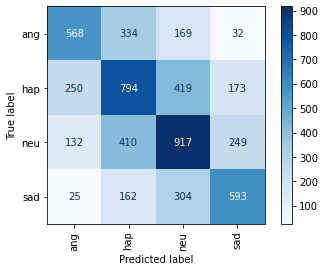

In [ ]:
k_fold_fit_re('CNN1DLSTM', XX, yy,lr = 0.0001, folds=10, numepoch = 200, batchsize = 32)

In [ ]:
def strat_k_fold_fit_re(model_type,X, yy, folds=10, lr=0.0001, numepoch = 50, batchsize = 32):
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import confusion_matrix
  from tensorflow.keras.optimizers import SGD
  from sklearn.preprocessing import LabelEncoder
  from sklearn.metrics import f1_score
  le = LabelEncoder()
  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []
  f1_per_fold = []
  verbosity = 1
  # Define the stratified K-fold Cross Validator
  kfold = StratifiedKFold(n_splits=folds, shuffle=True)
  # K-fold Cross Validation model evaluation
  fold_no = 1
  for train, test in kfold.split(X, y):
    #label encoding comes after the split
    yy = to_categorical(le.fit_transform(y))
    model = CNN1DLSTM()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model and save details to history
    history = model.fit(X[train], yy[train],
                batch_size=batchsize,
                epochs=numepoch,
                verbose=verbosity)
    # Generate generalization metrics
    scores = model.evaluate(X[test], yy[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    #Confusion matrix
    y_pred = np.argmax(model.predict(X[test]), axis=-1)
    matrix = metrics.confusion_matrix(yy[test].argmax(axis=1), y_pred)
    #f1 score
    f1_score_temp = f1_score(yy[test].argmax(axis=1), y_pred, average='weighted')
    f1_per_fold.append(f1_score_temp*100)
    #conf matrix ctnd
    rounded_labels= np.unique(le.inverse_transform(np.argmax(yy[test], axis=1)))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
    disp.plot(cmap=plt.cm.Blues,xticks_rotation='vertical')
    plt.show()
    # == Print average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1: {f1_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print(f'> F1: {np.mean(f1_per_fold)}')
    print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
156/156 [==============================] - 4s 17ms/step - loss: 1.2545 - accuracy: 0.4067
Epoch 2/200
156/156 [==============================] - 3s 17ms/step - loss: 1.1640 - accuracy: 0.4551
Epoch 3/200
156/156 [==============================] - 3s 17ms/step - loss: 1.1081 - accuracy: 0.4882
Epoch 4/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0908 - accuracy: 0.4911
Epoch 5/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0665 - accuracy: 0.5162
Epoch 6/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0575 - accuracy: 0.5254
Epoch 7/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0388 - accuracy: 0.5355
Epoch 8/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0212 - accuracy: 0.5383
Epoch 9/200
156/156 [==============================] - 3s 17ms/step - loss: 1.0013 - ac

156/156 [==============================] - 3s 18ms/step - loss: 0.0472 - accuracy: 0.9861
Epoch 80/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0640 - accuracy: 0.9777
Epoch 81/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 82/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0436 - accuracy: 0.9847
Epoch 83/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0832 - accuracy: 0.9715
Epoch 84/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0509 - accuracy: 0.9831
Epoch 85/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0416 - accuracy: 0.9859
Epoch 86/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0605 - accuracy: 0.9803
Epoch 87/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0789 - accuracy: 0.9727
Epoch 88/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0595 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0386 - accuracy: 0.9861
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 160/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0312 - accuracy: 0.9892
Epoch 161/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0328 - accuracy: 0.9906
Epoch 162/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0400 - accuracy: 0.9863
Epoch 163/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0160 - accuracy: 0.9960
Epoch 164/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0248 - accuracy: 0.9914
Epoch 165/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 166/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0347 - accuracy: 0.9881
Epoch 167/200
156/156 [==============================] - 3s 17ms/step - loss: 

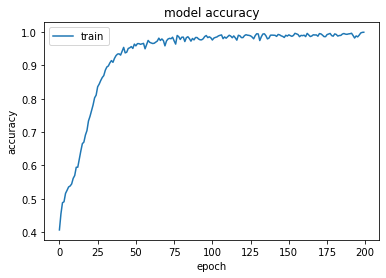

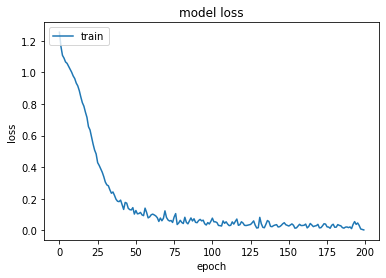

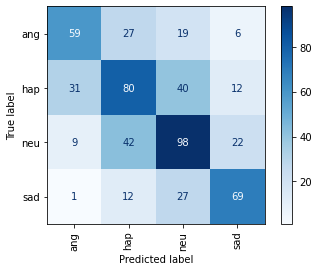

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 55.23465871810913 (+- 0.0)
> Loss: 3.3768136501312256
> F1: 55.23121374548987
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
156/156 [==============================] - 5s 18ms/step - loss: 1.2620 - accuracy: 0.4052
Epoch 2/200
156/156 [==============================] - 3s 16ms/step - loss: 1.1523 - accuracy: 0.4654
Epoch 3/200
156/156 [==============================] - 3s 17ms/step - loss: 1.1070 - accuracy: 0.4849
Epoch 4/200
156/156 [==============================] - 3s 17ms/step - loss: 1.

156/156 [==============================] - 3s 17ms/step - loss: 0.1089 - accuracy: 0.9630
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0540 - accuracy: 0.9811
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0340 - accuracy: 0.9885
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0698 - accuracy: 0.9783
Epoch 78/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0873 - accuracy: 0.9711
Epoch 79/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1068 - accuracy: 0.9652
Epoch 80/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0491 - accuracy: 0.9839
Epoch 81/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0472 - accuracy: 0.9867
Epoch 82/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0675 - accuracy: 0.9771
Epoch 83/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0720 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0358 - accuracy: 0.9898
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0424 - accuracy: 0.9855
Epoch 156/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0310 - accuracy: 0.9910
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0279 - accuracy: 0.9918
Epoch 158/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0257 - accuracy: 0.9912
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0175 - accuracy: 0.9956
Epoch 160/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0316 - accuracy: 0.9898
Epoch 161/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0530 - accuracy: 0.9823
Epoch 162/200
156/156 [==============================] - 3s 17ms/step - loss: 

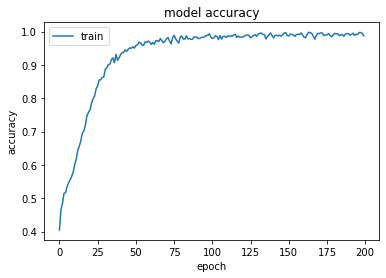

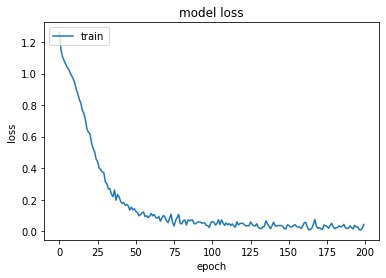

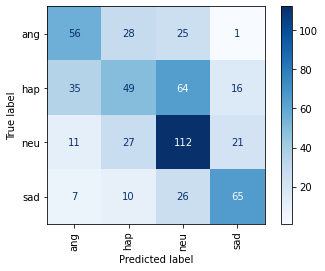

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 53.11461687088013 (+- 2.120041847229004)
> Loss: 3.4422394037246704
> F1: 52.64726580522098
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
156/156 [==============================] - 4s 18ms/step - loss: 1.2682 - accuracy: 0.4068
Epoch 2/200
156/156 [==============================] - 3s 17ms/step - loss: 1.1611 - accuracy: 0.4604


156/156 [==============================] - 3s 17ms/step - loss: 0.0782 - accuracy: 0.9761
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0688 - accuracy: 0.9765
Epoch 74/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0848 - accuracy: 0.9729
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0589 - accuracy: 0.9803
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0880 - accuracy: 0.9719
Epoch 78/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0713 - accuracy: 0.9763
Epoch 79/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0573 - accuracy: 0.9831
Epoch 80/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0360 - accuracy: 0.9892
Epoch 81/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0531 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0612 - accuracy: 0.9821
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0326 - accuracy: 0.9885
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0305 - accuracy: 0.9908
Epoch 156/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0557 - accuracy: 0.9817
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 158/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 160/200
156/156 [==============================] - 3s 17ms/step - loss: 

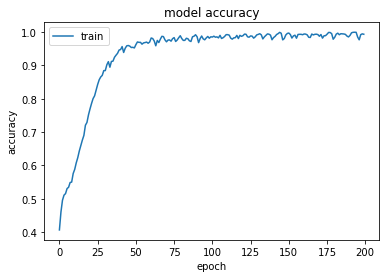

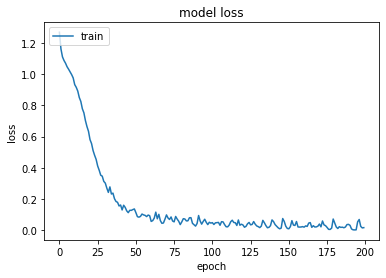

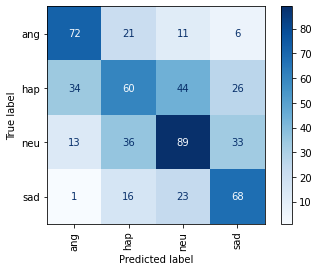

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 52.82987753550211 (+- 1.777227597755692)
> Loss: 3.4035377502441406
> F1: 52.345404690471234
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
156/156 [=================

156/156 [==============================] - 3s 17ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0920 - accuracy: 0.9671
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0934 - accuracy: 0.9681
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0746 - accuracy: 0.9761
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0407 - accuracy: 0.9861
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1004 - accuracy: 0.9644
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0739 - accuracy: 0.9743
Epoch 78/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0658 - accuracy: 0.9775
Epoch 79/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0446 - accuracy: 0.9871
Epoch 80/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0314 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0334 - accuracy: 0.9888
Epoch 151/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0443 - accuracy: 0.9855
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0314 - accuracy: 0.9916
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 156/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0330 - accuracy: 0.9916
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0355 - accuracy: 0.9859
Epoch 158/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0436 - accuracy: 0.9855
Epoch 159/200
156/156 [==============================] - 3s 17ms/step - loss: 

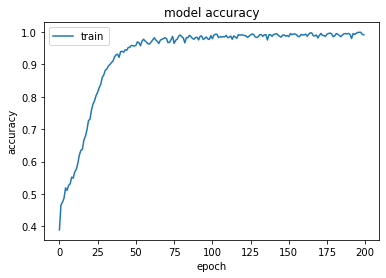

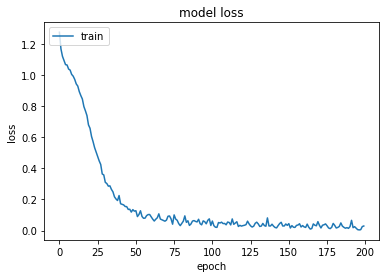

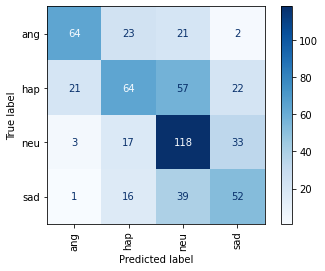

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 53.09437960386276 (+- 1.6058603560613642)
> Loss: 3.4189115166664124
> F1: 52.632862073182864
-------------------------------------------

156/156 [==============================] - 3s 17ms/step - loss: 0.0750 - accuracy: 0.9749
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0694 - accuracy: 0.9783
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0621 - accuracy: 0.9787
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0701 - accuracy: 0.9757
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0669 - accuracy: 0.9773
Epoch 74/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0720 - accuracy: 0.9753
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0533 - accuracy: 0.9823
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0870 - accuracy: 0.9703
Epoch 78/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0682 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0585 - accuracy: 0.9839
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0388 - accuracy: 0.9875
Epoch 150/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0163 - accuracy: 0.9958
Epoch 151/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0200 - accuracy: 0.9924
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0616 - accuracy: 0.9797
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0368 - accuracy: 0.9894
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0321 - accuracy: 0.9890
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0281 - accuracy: 0.9916
Epoch 156/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 157/200
156/156 [==============================] - 3s 17ms/step - loss: 

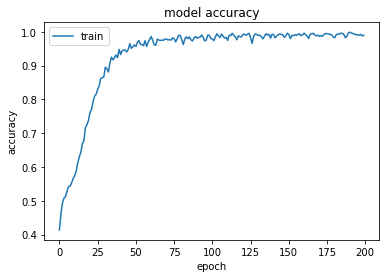

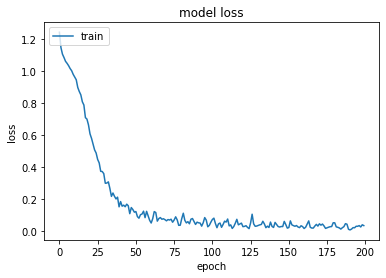

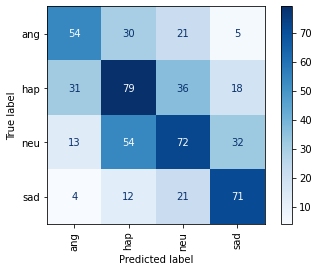

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
Average scores

156/156 [==============================] - 3s 17ms/step - loss: 0.0671 - accuracy: 0.9777
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0795 - accuracy: 0.9745
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0690 - accuracy: 0.9753
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0798 - accuracy: 0.9729
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0457 - accuracy: 0.9851
Epoch 73/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0566 - accuracy: 0.9807
Epoch 74/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0567 - accuracy: 0.9813
Epoch 75/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0606 - accuracy: 0.9789
Epoch 76/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0768 - accuracy: 0.9739
Epoch 77/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0946 - 

156/156 [==============================] - 3s 17ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 148/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0276 - accuracy: 0.9930
Epoch 149/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0550 - accuracy: 0.9825
Epoch 150/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0420 - accuracy: 0.9857
Epoch 152/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 153/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 154/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0198 - accuracy: 0.9942
Epoch 155/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0220 - accuracy: 0.9940
Epoch 156/200
156/156 [==============================] - 3s 18ms/step - loss: 

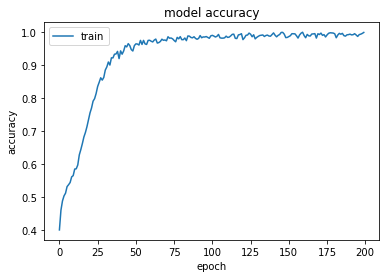

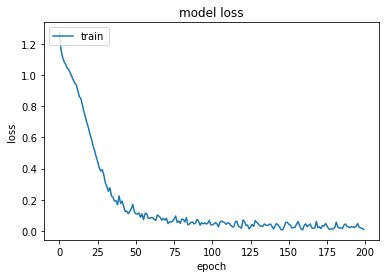

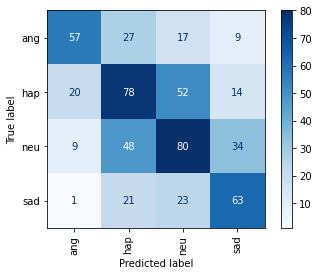

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.0849 - accuracy: 0.9743
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0660 - accuracy: 0.9795
Epoch 68/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0608 - accuracy: 0.9809
Epoch 70/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0689 - accuracy: 0.9771
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0639 - accuracy: 0.9809
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0528 - accuracy: 0.9833
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0826 - accuracy: 0.9721
Epoch 74/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0830 - accuracy: 0.9739
Epoch 75/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0499 - 

156/156 [==============================] - 3s 22ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 146/200
156/156 [==============================] - 3s 22ms/step - loss: 0.0554 - accuracy: 0.9803
Epoch 147/200
156/156 [==============================] - 3s 21ms/step - loss: 0.0664 - accuracy: 0.9801
Epoch 148/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 149/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0250 - accuracy: 0.9926
Epoch 150/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0379 - accuracy: 0.9877
Epoch 151/200
156/156 [==============================] - 3s 19ms/step - loss: 0.0745 - accuracy: 0.9745
Epoch 152/200
156/156 [==============================] - 3s 22ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 153/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0137 - accuracy: 0.9964
Epoch 154/200
156/156 [==============================] - 3s 18ms/step - loss: 

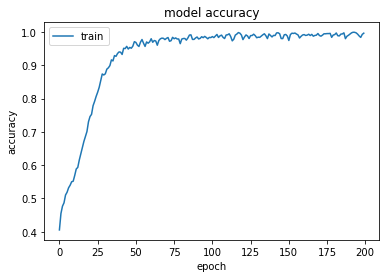

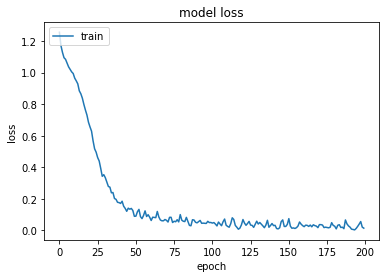

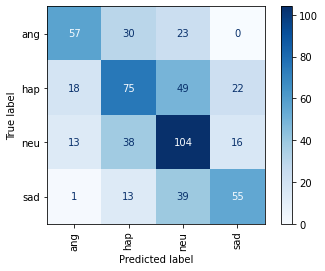

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.0610 - accuracy: 0.9805
Epoch 65/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 66/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0587 - accuracy: 0.9817
Epoch 67/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0757 - accuracy: 0.9749
Epoch 68/200
156/156 [==============================] - 3s 18ms/step - loss: 0.1397 - accuracy: 0.9516
Epoch 69/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0806 - accuracy: 0.9741
Epoch 70/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0481 - accuracy: 0.9859
Epoch 71/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0561 - accuracy: 0.9835
Epoch 72/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0832 - accuracy: 0.9749
Epoch 73/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0867 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0189 - accuracy: 0.9950
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0217 - accuracy: 0.9918
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0286 - accuracy: 0.9930
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0485 - accuracy: 0.9861
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0351 - accuracy: 0.9869
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0491 - accuracy: 0.9841
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0475 - accuracy: 0.9861
Epoch 152/200
156/156 [==============================] - 3s 18ms/step - loss: 

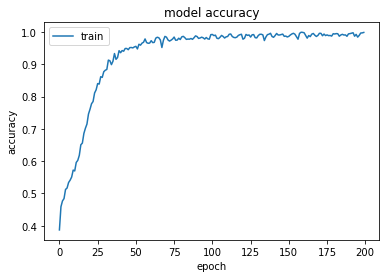

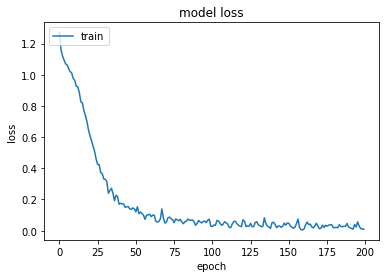

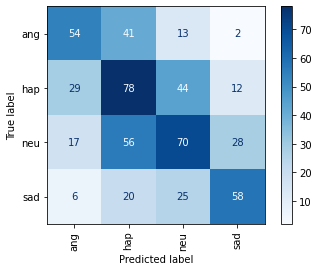

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.0611 - accuracy: 0.9811
Epoch 64/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0819 - accuracy: 0.9743
Epoch 65/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0977 - accuracy: 0.9689
Epoch 66/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0976 - accuracy: 0.9675
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0791 - accuracy: 0.9741
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0735 - accuracy: 0.9767
Epoch 69/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1272 - accuracy: 0.9546
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0631 - accuracy: 0.9789
Epoch 71/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0558 - accuracy: 0.9815
Epoch 72/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0790 - 

156/156 [==============================] - 3s 18ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0366 - accuracy: 0.9865
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0586 - accuracy: 0.9809
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0342 - accuracy: 0.9877
Epoch 146/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0426 - accuracy: 0.9851
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0352 - accuracy: 0.9867
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0253 - accuracy: 0.9930
Epoch 150/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0321 - accuracy: 0.9894
Epoch 151/200
156/156 [==============================] - 3s 18ms/step - loss: 

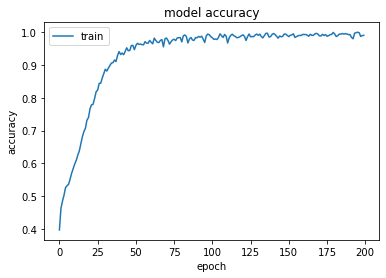

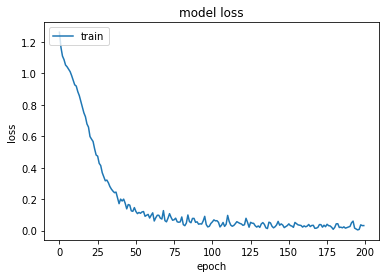

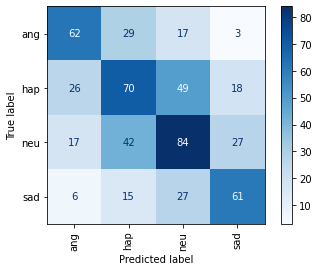

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
> Fold 6 - Los

156/156 [==============================] - 3s 18ms/step - loss: 0.1020 - accuracy: 0.9683
Epoch 62/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1153 - accuracy: 0.9598
Epoch 63/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0619 - accuracy: 0.9795
Epoch 64/200
156/156 [==============================] - 3s 17ms/step - loss: 0.1064 - accuracy: 0.9616
Epoch 65/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0884 - accuracy: 0.9705
Epoch 66/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0672 - accuracy: 0.9759
Epoch 67/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0572 - accuracy: 0.9807
Epoch 68/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0698 - accuracy: 0.9771
Epoch 69/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0736 - accuracy: 0.9753
Epoch 70/200
156/156 [==============================] - 3s 17ms/step - loss: 0.0806 - 

156/156 [==============================] - 4s 24ms/step - loss: 0.0122 - accuracy: 0.9964
Epoch 141/200
156/156 [==============================] - 3s 20ms/step - loss: 0.0532 - accuracy: 0.9825
Epoch 142/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0518 - accuracy: 0.9833
Epoch 143/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 144/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 145/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0285 - accuracy: 0.9904
Epoch 146/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0394 - accuracy: 0.9859
Epoch 147/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 148/200
156/156 [==============================] - 3s 18ms/step - loss: 0.0273 - accuracy: 0.9900
Epoch 149/200
156/156 [==============================] - 3s 18ms/step - loss: 

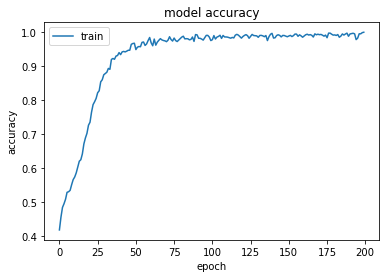

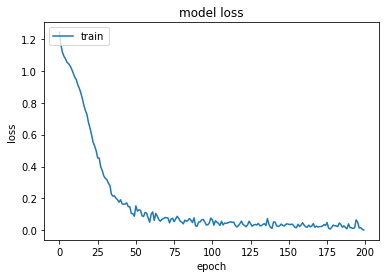

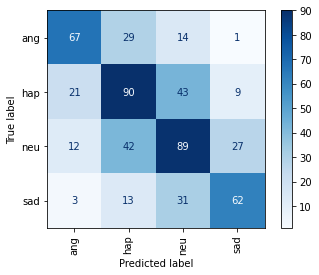

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.3768136501312256 - Accuracy: 55.23465871810913% - F1: 55.23121374548987%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.5076651573181152 - Accuracy: 50.99457502365112% - F1: 50.063317864952104%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.326134443283081 - Accuracy: 52.260398864746094% - F1: 51.74168246097174%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.4650328159332275 - Accuracy: 53.8878858089447% - F1: 53.49523422131776%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2115797996520996 - Accuracy: 49.90958273410797% - F1: 49.67867195885016%
------------------------------------------------------------------------
> Fold 6 - Los

In [ ]:
strat_k_fold_fit_re('CNN1dLSTM', XX, yy, folds=10, lr=0.0001, numepoch = 200, batchsize = 32)

Augmented IEMOCAP
at this point, google colab is fixed


In [ ]:
feat_aug = pd.read_csv (r'D:\Desktop\Migrate\DIploma\Final_Diploma\feautes\features_augmented.csv',index_col=0)
feat_aug

,class_label,path,method,gender,0,1,2,3,4,5,...,151,152,153,154,155,156,157,158,159,160
0,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.137569,0.136501,0.140522,0.141562,0.147341,0.149700,...,1.056575e-12,1.041180e-12,0.001177,0.006656,0.001192,-0.016840,0.005612,-0.001975,-0.002578,0.007191
1,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.872480,0.876876,0.891893,0.901902,0.917757,0.919299,...,1.484410e-05,1.469430e-05,0.001743,-0.001192,0.001037,-0.007539,0.002779,0.001421,-0.007533,0.428162
2,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.135375,0.135992,0.135595,0.138835,0.137306,0.139360,...,1.665008e-11,4.328018e-11,0.000612,0.000349,0.001394,-0.013628,-0.010225,0.000049,0.002864,0.008010
3,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.132590,0.137295,0.130744,0.132916,0.141996,0.146615,...,1.567742e-11,4.201048e-11,0.000602,0.000242,0.000366,-0.011372,-0.009451,-0.000418,0.001561,0.007967
4,neu,Session1/sentences/wav/Ses01F_script02_1/Ses01...,script,F,0.118204,0.118115,0.124662,0.126564,0.126506,0.131407,...,1.437042e-11,1.415136e-11,0.003022,-0.006679,0.009356,-0.014001,-0.001720,-0.002316,-0.003682,0.006032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.124990,0.126062,0.123110,0.117223,0.123200,0.114749,...,9.038142e-13,2.458850e-12,0.000122,0.003185,0.004228,-0.012076,0.008719,0.001903,-0.001372,0.004458
22120,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.705455,0.653024,0.663702,0.682044,0.677211,0.689347,...,2.656345e-13,2.613827e-13,0.003804,-0.041517,0.031855,-0.017729,-0.015015,0.011951,0.001113,0.027253
22121,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.769798,0.734634,0.744662,0.760764,0.763683,0.778447,...,9.082036e-06,9.032885e-06,0.003888,-0.038943,0.024749,-0.013394,-0.011133,0.012373,0.000947,0.126646
22122,neu,Session5/sentences/wav/Ses05F_impro06/Ses05F_i...,impro,F,0.688202,0.652545,0.611138,0.633777,0.634755,0.628070,...,1.109354e-12,2.213903e-12,0.001690,0.009872,-0.018989,0.027518,-0.015412,-0.005417,-0.001227,0.034339


In [ ]:
X = feat_aug.drop(['path','class_label','path','method','gender'],axis=1)
X.shape
#normalization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean)/std
XX = np.array(X)
y = feat_aug.class_label
yy = np.array(y)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
yy = to_categorical(lb.fit_transform(yy))
XX = XX[:,:, np.newaxis]
XX.shape

(22124, 161, 1)

In [ ]:
yy.shape

(22124, 4)

In [ ]:
def k_fold_fit_re(model_type, X, yy, lr = 0.0001, folds=10, numepoch = 100, batchsize = 32):
  from sklearn.model_selection import KFold
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import f1_score
  from tensorflow import keras
  from sklearn import metrics 
  from functools import reduce
  #pred and ground truth for overall conf matrix
  truth = []
  predicted = []
  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []
  f1_per_fold = []
  verbosity = 1
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(X, yy):
    model = CNN1D()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model
    history = model.fit(X[train],
                yy[train],
                batch_size=batchsize,
                epochs=numepoch,
                verbose=verbosity)
    # Generate generalization metrics
    scores = model.evaluate(X[test], yy[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    #Confusion matrix construction
    y_pred = np.argmax(model.predict(X[test]), axis=-1)
    matrix = metrics.confusion_matrix(yy[test].argmax(axis=1), y_pred)
    #f1 score
    f1_score_temp = f1_score(yy[test].argmax(axis=1), y_pred, average='weighted')
    f1_per_fold.append(f1_score_temp*100)
    #append predicted and ground truth to corresponding lists
    truth.append(yy[test].argmax(axis=1).tolist())
    predicted.append(y_pred.tolist())
    #conf matrix contd
    rounded_labels= np.unique(lb.inverse_transform(np.argmax(yy[test], axis=1)))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    # == Print average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1: {f1_per_fold[i]}')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print(f'> F1: {np.mean(f1_per_fold)}')
    print('------------------------------------------------------------------------')
  #flatten the nested lists
  print('Confusion matrix over all folders')
  truth = reduce(lambda x,y: x+y, truth)
  predicted = reduce(lambda x,y:x+y, predicted)
  matrix = metrics.confusion_matrix(truth, predicted)
  rounded_labels= np.unique(lb.inverse_transform(np.argmax(yy, axis=1)))
  disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rounded_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
623/623 [==============================] - 13s 18ms/step - loss: 3.7122 - accuracy: 0.4008
Epoch 2/10
623/623 [==============================] - 11s 18ms/step - loss: 3.0773 - accuracy: 0.4484
Epoch 3/10
623/623 [==============================] - 11s 18ms/step - loss: 2.5204 - accuracy: 0.4638
Epoch 4/10
623/623 [==============================] - 11s 18ms/step - loss: 2.0337 - accuracy: 0.4832
Epoch 5/10
623/623 [==============================] - 11s 18ms/step - loss: 1.6730 - accuracy: 0.4969
Epoch 6/10
623/623 [==============================] - 11s 18ms/step - loss: 1.4266 - accuracy: 0.5062
Epoch 7/10
623/623 [==============================] - 11s 18ms/step - loss: 1.2711 - accuracy: 0.5158
Epoch 8/10
623/623 [==============================] - 11s 18ms/step - loss: 1.1756 - accuracy: 0.5267
Epoch 9/10
623/623 [==============================] - 12s 19ms/step - loss: 1.1153 - ac

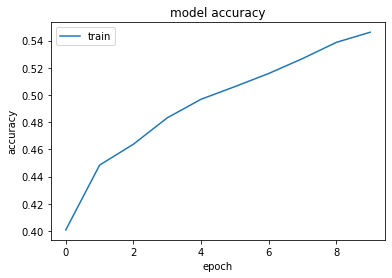

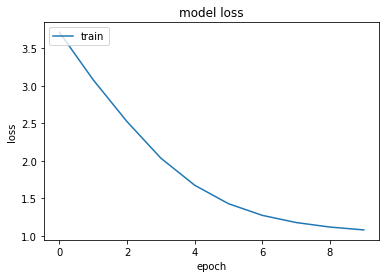

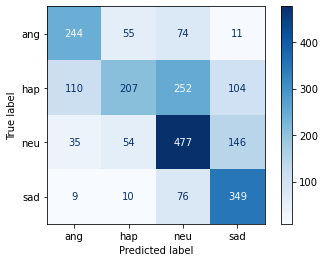

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.019232153892517 - Accuracy: 57.70447254180908% - F1: 56.00986261557953
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 57.70447254180908 (+- 0.0)
> Loss: 1.019232153892517
> F1: 56.00986261557953
------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
623/623 [==============================] - 13s 19ms/step - loss: 3.7448 - accuracy: 0.3945
Epoch 2/10
133/623 [=====>........................] - ETA: 8s - loss: 3.3429 - accuracy: 0.4337

KeyboardInterrupt: 

In [ ]:
k_fold_fit_re('CNN1D', XX, yy, folds=10, lr=0.0001, numepoch = 10, batchsize = 32)